# Comp 551 - Assignment 1
## Taha Salman (260721174)



### Part 1 - Sampling
#### Question 2 

In [1]:
'''
(Question 2)

This program implements the pseudocode written down in question 1 and finds the sampling distribution for the grad
student specified.
'''
from random import random

def pick_activity():
    '''
    This method randomly picks an activity for the given day based on the given probabilities.
    '''
    random_num = random()
    if random_num < 0.2:
        return "M"
    elif random_num < 0.6:
        return "C"
    elif random_num < 0.7:
        return "P"
    else:
        return "S"

def simulate_days(num_days):
    '''
    This method simulates the number of days specified to create a sample distribution for the grad student's schedule.
    '''
    count = 0
    '''
    This variable stores a record of the number of times an activity was done during the specified time interval. Each
    activity is represented by a character which is the same as its first letter capitalized.
    '''
    activities_counter = {      
        "M": 0,
        "C": 0,
        "P": 0,
        "S": 0
    }

    while count<num_days:
        activity = pick_activity()
        activities_counter[activity] += 1
        count+=1

    distribution = {}

    for activity in activities_counter:
        distribution[activity] = activities_counter[activity]/num_days

    return distribution

def print_simulation_distribution(days):
    '''
    This method calls the simulate days method and then prints a user-friendly text output.
    '''
    distribution = simulate_days(days)
    print("A sampling distribution for the grad student's routine for {} days is:".format(days))
    print("{} of these days were spent watching movies".format(distribution['M']))
    print("{} of these days were spent doing COMP 551".format(distribution['C']))
    print("{} of these days were spent playing".format(distribution['P']))
    print("{} of these days were spent studying".format(distribution['S']))
    print("_______________________________________")
    
if __name__=="__main__":
    print_simulation_distribution(100)
    print_simulation_distribution(1000)


A sampling distribution for the grad student's routine for 100 days is:
0.14 of these days were spent watching movies
0.43 of these days were spent doing COMP 551
0.15 of these days were spent playing
0.28 of these days were spent studying
_______________________________________
A sampling distribution for the grad student's routine for 1000 days is:
0.206 of these days were spent watching movies
0.4 of these days were spent doing COMP 551
0.094 of these days were spent playing
0.3 of these days were spent studying
_______________________________________


* * * 
### Part 2 - Model Selection

#### Question 1 

The Mean Squared Error for the Training Data using a degree 20 polynomial fit is 6.474680065000765
The Mean Squared Error for the Validation Data using a degree 20 polynomial fit is 1418.5143681043703


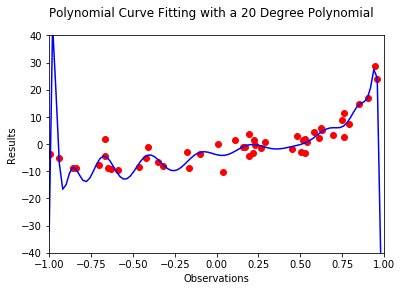

In [23]:
'''
This program has been specifically tailored to answer question 2 in assignment 1. Its methods
and classes are specifically tailored for this question, however, I have tried to make them
as abstract as possible for other similar programming needs.
'''
import matplotlib.pyplot as plt
import numpy as np

TRAINING_DATA = None
VALIDATION_DATA = None
TEST_DATA = None

class DataSet():
    def __init__(self,inp,out):
        self.x = inp
        self.y = out

class PolynomialMaster():
    '''
    This class can be used to generate the best polynomial fits for a line
    '''

    def __init__(self,dataset):
        self.dataset = dataset

    def get_best_fit(self,degree):
        '''
        Using the initialized data set this method finds the best fit polynomial
        of the specified n-th degree. It uses the least squares regression method
        and returns an array containing all the coefficients found with this method.
        '''
        rows = len(self.dataset.x)
        cols = degree + 1
        basis_array = np.zeros((rows, cols))

        for i in range(0, rows):
            for j in range(0, cols):
                basis_array[i][j] = PolynomialMaster.polynomial_basis_function(j, self.dataset.x[i])

        mpps_of_basis = np.linalg.pinv(basis_array)

        return np.matmul(mpps_of_basis,np.array(self.dataset.y))

    def get_best_fit_l2(self,degree,lambda_val):
        rows = len(self.dataset.x)
        cols = degree + 1
        basis_array = np.zeros((rows, cols))

        for i in range(0, rows):
            for j in range(0, cols):
                basis_array[i][j] = PolynomialMaster.polynomial_basis_function(j, self.dataset.x[i])

        # output = np.matmul(basis_array.transpose(),basis_array)
        # output = output + (lambda_val * np.identity(cols))
        # output = np.linalg.inv(output)

        output = np.linalg.inv((np.matmul(basis_array.transpose(),basis_array)+(lambda_val * np.identity(cols))))
        output = np.matmul(np.matmul(output,basis_array.transpose()),self.dataset.y)
        return output

    @staticmethod
    def get_mean_squared_error(target_values, predictions):
        output = 0
        num_predictions = len(predictions)
        for i in range(0, num_predictions):
            output += ((target_values[i] - predictions[i]) ** 2)

        return (output / num_predictions)

    @staticmethod
    def get_polynomial_output(x,coefficients):
        '''
        Returns the output of the polynomial for a given x and its coefficients.
        The coefficients must be in ascending order
        '''
        degree = len(coefficients)

        output = 0
        for power in range(0, degree):
            output += coefficients[power] * (x ** power)

        return output

    @staticmethod
    def polynomial_basis_function(power, x):
        if power == 0:
            return 1
        else:
            return x**power

    @staticmethod
    def get_predictions(inputs,coefficients):
        predictions = []
        for input in inputs:
            predictions.append(PolynomialMaster.get_polynomial_output(input,coefficients))

        return predictions

class Plotter():
    def add_plot(self,x,y,plot_type='r.',label=None):
        if label:
            return plt.plot(x,y,plot_type,label)
        else:
            return plt.plot(x,y,plot_type)

    def add_best_fit_poly(self,coefficients,plot_type='b-',num_sample_points=100,range=(-1,1)):
        best_fit_x = np.linspace(range[0], range[1], num_sample_points)
        best_fit_y = PolynomialMaster.get_polynomial_output(best_fit_x, coefficients)
        plt.plot(best_fit_x,best_fit_y,plot_type)

    def set_axis(self,axis):
        plt.axis(axis)

    def set_xLabel(self,label):
        plt.xlabel(label)

    def set_yLabel(self,label):
        plt.ylabel(label)

    def set_main_title(self,title):
        plt.suptitle(title)

    def show(self):
        plt.show()

    def modify_legend(self,**kwargs):
        plt.legend(**kwargs)

def initialize_data():
    '''
    This method calls the read_data method and initializes the data into the empty variables
    created at the beginning of the program
    '''
    global TRAINING_DATA
    TRAINING_DATA = read_data("Datasets/Dataset_1_train.csv")
    global VALIDATION_DATA
    VALIDATION_DATA = read_data("Datasets/Dataset_1_valid.csv")
    global TEST_DATA
    TEST_DATA = read_data("Datasets/Dataset_1_test.csv")


def read_data(filename):
    inp = []
    out = []
    with open(filename, 'r') as f:
        for line in f:
            temp_line = line.split(',')
            inp.append(float(temp_line[0]))
            out.append(float(temp_line[1]))
    return DataSet(inp, out)

def divide_interval(interval,num_divisions,end_point_inclusive=True):
    '''
    This method takes in a tuple that represents an interval and returns a list with the given number
    of divisions. If the variable end_point_inclusive is set to true then the returned list has
    the end_point_included
    '''
    output = [interval[0]]
    if interval[0] < interval[1]:
        delta = (interval[1] - interval[0])/num_divisions
        point = interval[0] + delta
        while point < interval[1]:
            output.append(point)
            point+=delta

    if end_point_inclusive:
        output.append(interval[1])

    return output

def find_min(dict_in):
    '''
    Takes a dictionary as input and returns the key and val with the smallest value
    '''
    if len(dict_in) < 1:
        return None

    min_key = list(dict_in.keys())[0]
    min_value = dict_in[min_key]
    output = [min_key,min_value]

    for key,val in dict_in.items():
        if val < output[1]:
            output[0] = key
            output[1] = val

    return output



def run_part_1():
    #Initialize data, classes, and variables
    initialize_data()
    plotter = Plotter()
    degree = 20

    #Load training data into class and generate coefficients for best fit polynomial
    poly_master = PolynomialMaster(TRAINING_DATA)
    coefficients = poly_master.get_best_fit(degree)

    #Get Mean Squared Error with validation data
    training_predictions = poly_master.get_predictions(TRAINING_DATA.x, coefficients)
    validation_predictions = poly_master.get_predictions(VALIDATION_DATA.x, coefficients)
    training_mse = poly_master.get_mean_squared_error(TRAINING_DATA.y,training_predictions)
    validation_mse = poly_master.get_mean_squared_error(VALIDATION_DATA.y,validation_predictions)
    print("The Mean Squared Error for the Training Data using a degree {} polynomial fit is {}".format(degree,training_mse))
    print("The Mean Squared Error for the Validation Data using a degree {} polynomial fit is {}".format(degree,validation_mse))

    plotter.add_plot(TRAINING_DATA.x,TRAINING_DATA.y,'ro')
    plotter.add_best_fit_poly(coefficients)
    plotter.set_axis([-1,1,-40,40])
    plotter.set_xLabel("Observations")
    plotter.set_yLabel("Results")
    plotter.set_main_title("Polynomial Curve Fitting with a {} Degree Polynomial".format(degree))
    plotter.show()


def run_part_2_a():
    # Initialize data, classes, and variables
    initialize_data()
    plotter = Plotter()
    degree = 20
    lambda_divisions = 100
    mse_training = {}
    mse_validation = {}

    poly_master = PolynomialMaster(TRAINING_DATA)

    lambda_values = divide_interval([0,1],lambda_divisions,True)
    for val in lambda_values:
        coefficients = poly_master.get_best_fit_l2(degree,val)
        training_predictions = poly_master.get_predictions(TRAINING_DATA.x,coefficients)
        validation_predictions = poly_master.get_predictions(VALIDATION_DATA.x,coefficients)

        mse_training[val] = poly_master.get_mean_squared_error(TRAINING_DATA.y,training_predictions)
        mse_validation[val] = poly_master.get_mean_squared_error(VALIDATION_DATA.y,validation_predictions)


    plot1, = plt.plot(mse_training.keys(),mse_training.values(),'b-',label="Training Data MSE")
    plot2, = plt.plot(mse_validation.keys(),mse_validation.values(),'r-',label="Validation Data MSE")
    plotter.set_axis([0,1,0,15])
    plotter.set_xLabel("Lambda Values")
    plotter.set_yLabel("Mean Squared Error")
    plotter.set_main_title("Mean Squared Error Values for Different Lambda Values")
    plotter.modify_legend()
    plotter.show()

def run_part_2_b():
    # Initialize data, classes, and variables
    initialize_data()
    plotter = Plotter()
    degree = 20

    lambda_divisions = 100
    mse_training = {}
    mse_validation = {}

    poly_master = PolynomialMaster(TRAINING_DATA)

    lambda_values = divide_interval([0, 1], lambda_divisions, True)
    for val in lambda_values:
        coefficients = poly_master.get_best_fit_l2(degree, val)
        training_predictions = poly_master.get_predictions(TRAINING_DATA.x, coefficients)
        validation_predictions = poly_master.get_predictions(VALIDATION_DATA.x, coefficients)

        mse_training[val] = poly_master.get_mean_squared_error(TRAINING_DATA.y, training_predictions)
        mse_validation[val] = poly_master.get_mean_squared_error(VALIDATION_DATA.y, validation_predictions)

    smallest_mse= find_min(mse_validation)
    print("The smallest mean squared error found for the validation "
          "data is {} with lambda value = {}".format(smallest_mse[1],smallest_mse[0]))

def run_part_2_c(lambda_val):
    # Initialize data, classes, and variables
    initialize_data()
    plotter = Plotter()
    degree = 20

    # Load training data into class and generate coefficients for best fit polynomial
    poly_master = PolynomialMaster(TRAINING_DATA)
    coefficients = poly_master.get_best_fit_l2(degree,lambda_val=lambda_val)

    plotter.add_plot(TRAINING_DATA.x, TRAINING_DATA.y, 'ro')
    plotter.add_best_fit_poly(coefficients)
    plotter.set_axis([-1, 1, -40, 40])
    plotter.set_xLabel("Observations")
    plotter.set_yLabel("Results")
    plotter.set_main_title("Polynomial Curve Fitting with a {} Degree Polynomial".format(degree))
    plotter.show()


if __name__ == "__main__":
    run_part_1()

#### Question 2 
##### a)

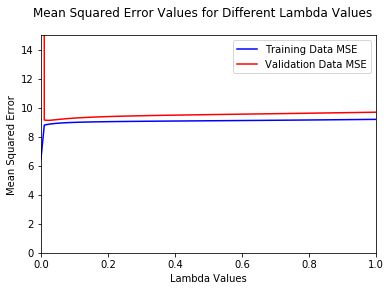

In [24]:
'''
This program has been specifically tailored to answer question 2 in assignment 1. Its methods
and classes are specifically tailored for this question, however, I have tried to make them
as abstract as possible for other similar programming needs.
'''
import matplotlib.pyplot as plt
import numpy as np

TRAINING_DATA = None
VALIDATION_DATA = None
TEST_DATA = None

class DataSet():
    def __init__(self,inp,out):
        self.x = inp
        self.y = out

class PolynomialMaster():
    '''
    This class can be used to generate the best polynomial fits for a line
    '''

    def __init__(self,dataset):
        self.dataset = dataset

    def get_best_fit(self,degree):
        '''
        Using the initialized data set this method finds the best fit polynomial
        of the specified n-th degree. It uses the least squares regression method
        and returns an array containing all the coefficients found with this method.
        '''
        rows = len(self.dataset.x)
        cols = degree + 1
        basis_array = np.zeros((rows, cols))

        for i in range(0, rows):
            for j in range(0, cols):
                basis_array[i][j] = PolynomialMaster.polynomial_basis_function(j, self.dataset.x[i])

        mpps_of_basis = np.linalg.pinv(basis_array)

        return np.matmul(mpps_of_basis,np.array(self.dataset.y))

    def get_best_fit_l2(self,degree,lambda_val):
        rows = len(self.dataset.x)
        cols = degree + 1
        basis_array = np.zeros((rows, cols))

        for i in range(0, rows):
            for j in range(0, cols):
                basis_array[i][j] = PolynomialMaster.polynomial_basis_function(j, self.dataset.x[i])

        # output = np.matmul(basis_array.transpose(),basis_array)
        # output = output + (lambda_val * np.identity(cols))
        # output = np.linalg.inv(output)

        output = np.linalg.inv((np.matmul(basis_array.transpose(),basis_array)+(lambda_val * np.identity(cols))))
        output = np.matmul(np.matmul(output,basis_array.transpose()),self.dataset.y)
        return output

    @staticmethod
    def get_mean_squared_error(target_values, predictions):
        output = 0
        num_predictions = len(predictions)
        for i in range(0, num_predictions):
            output += ((target_values[i] - predictions[i]) ** 2)

        return (output / num_predictions)

    @staticmethod
    def get_polynomial_output(x,coefficients):
        '''
        Returns the output of the polynomial for a given x and its coefficients.
        The coefficients must be in ascending order
        '''
        degree = len(coefficients)

        output = 0
        for power in range(0, degree):
            output += coefficients[power] * (x ** power)

        return output

    @staticmethod
    def polynomial_basis_function(power, x):
        if power == 0:
            return 1
        else:
            return x**power

    @staticmethod
    def get_predictions(inputs,coefficients):
        predictions = []
        for input in inputs:
            predictions.append(PolynomialMaster.get_polynomial_output(input,coefficients))

        return predictions

class Plotter():
    def add_plot(self,x,y,plot_type='r.',label=None):
        if label:
            return plt.plot(x,y,plot_type,label)
        else:
            return plt.plot(x,y,plot_type)

    def add_best_fit_poly(self,coefficients,plot_type='b-',num_sample_points=100,range=(-1,1)):
        best_fit_x = np.linspace(range[0], range[1], num_sample_points)
        best_fit_y = PolynomialMaster.get_polynomial_output(best_fit_x, coefficients)
        plt.plot(best_fit_x,best_fit_y,plot_type)

    def set_axis(self,axis):
        plt.axis(axis)

    def set_xLabel(self,label):
        plt.xlabel(label)

    def set_yLabel(self,label):
        plt.ylabel(label)

    def set_main_title(self,title):
        plt.suptitle(title)

    def show(self):
        plt.show()

    def modify_legend(self,**kwargs):
        plt.legend(**kwargs)

def initialize_data():
    '''
    This method calls the read_data method and initializes the data into the empty variables
    created at the beginning of the program
    '''
    global TRAINING_DATA
    TRAINING_DATA = read_data("Datasets/Dataset_1_train.csv")
    global VALIDATION_DATA
    VALIDATION_DATA = read_data("Datasets/Dataset_1_valid.csv")
    global TEST_DATA
    TEST_DATA = read_data("Datasets/Dataset_1_test.csv")


def read_data(filename):
    inp = []
    out = []
    with open(filename, 'r') as f:
        for line in f:
            temp_line = line.split(',')
            inp.append(float(temp_line[0]))
            out.append(float(temp_line[1]))
    return DataSet(inp, out)

def divide_interval(interval,num_divisions,end_point_inclusive=True):
    '''
    This method takes in a tuple that represents an interval and returns a list with the given number
    of divisions. If the variable end_point_inclusive is set to true then the returned list has
    the end_point_included
    '''
    output = [interval[0]]
    if interval[0] < interval[1]:
        delta = (interval[1] - interval[0])/num_divisions
        point = interval[0] + delta
        while point < interval[1]:
            output.append(point)
            point+=delta

    if end_point_inclusive:
        output.append(interval[1])

    return output

def find_min(dict_in):
    '''
    Takes a dictionary as input and returns the key and val with the smallest value
    '''
    if len(dict_in) < 1:
        return None

    min_key = list(dict_in.keys())[0]
    min_value = dict_in[min_key]
    output = [min_key,min_value]

    for key,val in dict_in.items():
        if val < output[1]:
            output[0] = key
            output[1] = val

    return output



def run_part_1():
    #Initialize data, classes, and variables
    initialize_data()
    plotter = Plotter()
    degree = 20

    #Load training data into class and generate coefficients for best fit polynomial
    poly_master = PolynomialMaster(TRAINING_DATA)
    coefficients = poly_master.get_best_fit(degree)

    #Get Mean Squared Error with validation data
    training_predictions = poly_master.get_predictions(TRAINING_DATA.x, coefficients)
    validation_predictions = poly_master.get_predictions(VALIDATION_DATA.x, coefficients)
    training_mse = poly_master.get_mean_squared_error(TRAINING_DATA.y,training_predictions)
    validation_mse = poly_master.get_mean_squared_error(VALIDATION_DATA.y,validation_predictions)
    print("The Mean Squared Error for the Training Data using a degree {} polynomial fit is {}".format(degree,training_mse))
    print("The Mean Squared Error for the Validation Data using a degree {} polynomial fit is {}".format(degree,validation_mse))

    plotter.add_plot(TRAINING_DATA.x,TRAINING_DATA.y,'ro')
    plotter.add_best_fit_poly(coefficients)
    plotter.set_axis([-1,1,-40,40])
    plotter.set_xLabel("Observations")
    plotter.set_yLabel("Results")
    plotter.set_main_title("Polynomial Curve Fitting with a {} Degree Polynomial".format(degree))
    plotter.show()


def run_part_2_a():
    # Initialize data, classes, and variables
    initialize_data()
    plotter = Plotter()
    degree = 20
    lambda_divisions = 100
    mse_training = {}
    mse_validation = {}

    poly_master = PolynomialMaster(TRAINING_DATA)

    lambda_values = divide_interval([0,1],lambda_divisions,True)
    for val in lambda_values:
        coefficients = poly_master.get_best_fit_l2(degree,val)
        training_predictions = poly_master.get_predictions(TRAINING_DATA.x,coefficients)
        validation_predictions = poly_master.get_predictions(VALIDATION_DATA.x,coefficients)

        mse_training[val] = poly_master.get_mean_squared_error(TRAINING_DATA.y,training_predictions)
        mse_validation[val] = poly_master.get_mean_squared_error(VALIDATION_DATA.y,validation_predictions)


    plot1, = plt.plot(mse_training.keys(),mse_training.values(),'b-',label="Training Data MSE")
    plot2, = plt.plot(mse_validation.keys(),mse_validation.values(),'r-',label="Validation Data MSE")
    plotter.set_axis([0,1,0,15])
    plotter.set_xLabel("Lambda Values")
    plotter.set_yLabel("Mean Squared Error")
    plotter.set_main_title("Mean Squared Error Values for Different Lambda Values")
    plotter.modify_legend()
    plotter.show()

def run_part_2_b():
    # Initialize data, classes, and variables
    initialize_data()
    plotter = Plotter()
    degree = 20

    lambda_divisions = 100
    mse_training = {}
    mse_validation = {}

    poly_master = PolynomialMaster(TRAINING_DATA)

    lambda_values = divide_interval([0, 1], lambda_divisions, True)
    for val in lambda_values:
        coefficients = poly_master.get_best_fit_l2(degree, val)
        training_predictions = poly_master.get_predictions(TRAINING_DATA.x, coefficients)
        validation_predictions = poly_master.get_predictions(VALIDATION_DATA.x, coefficients)

        mse_training[val] = poly_master.get_mean_squared_error(TRAINING_DATA.y, training_predictions)
        mse_validation[val] = poly_master.get_mean_squared_error(VALIDATION_DATA.y, validation_predictions)

    smallest_mse= find_min(mse_validation)
    print("The smallest mean squared error found for the validation "
          "data is {} with lambda value = {}".format(smallest_mse[1],smallest_mse[0]))

def run_part_2_c(lambda_val):
    # Initialize data, classes, and variables
    initialize_data()
    plotter = Plotter()
    degree = 20

    # Load training data into class and generate coefficients for best fit polynomial
    poly_master = PolynomialMaster(TRAINING_DATA)
    coefficients = poly_master.get_best_fit_l2(degree,lambda_val=lambda_val)

    plotter.add_plot(TRAINING_DATA.x, TRAINING_DATA.y, 'ro')
    plotter.add_best_fit_poly(coefficients)
    plotter.set_axis([-1, 1, -40, 40])
    plotter.set_xLabel("Observations")
    plotter.set_yLabel("Results")
    plotter.set_main_title("Polynomial Curve Fitting with a {} Degree Polynomial".format(degree))
    plotter.show()


if __name__ == "__main__":
    run_part_2_a()

##### b)

In [1]:
'''
This program has been specifically tailored to answer question 2 in assignment 1. Its methods
and classes are specifically tailored for this question, however, I have tried to make them
as abstract as possible for other similar programming needs.
'''
import matplotlib.pyplot as plt
import numpy as np

TRAINING_DATA = None
VALIDATION_DATA = None
TEST_DATA = None

class DataSet():
    def __init__(self,inp,out):
        self.x = inp
        self.y = out

class PolynomialMaster():
    '''
    This class can be used to generate the best polynomial fits for a line
    '''

    def __init__(self,dataset):
        self.dataset = dataset

    def get_best_fit(self,degree):
        '''
        Using the initialized data set this method finds the best fit polynomial
        of the specified n-th degree. It uses the least squares regression method
        and returns an array containing all the coefficients found with this method.
        '''
        rows = len(self.dataset.x)
        cols = degree + 1
        basis_array = np.zeros((rows, cols))

        for i in range(0, rows):
            for j in range(0, cols):
                basis_array[i][j] = PolynomialMaster.polynomial_basis_function(j, self.dataset.x[i])

        mpps_of_basis = np.linalg.pinv(basis_array)

        return np.matmul(mpps_of_basis,np.array(self.dataset.y))

    def get_best_fit_l2(self,degree,lambda_val):
        rows = len(self.dataset.x)
        cols = degree + 1
        basis_array = np.zeros((rows, cols))

        for i in range(0, rows):
            for j in range(0, cols):
                basis_array[i][j] = PolynomialMaster.polynomial_basis_function(j, self.dataset.x[i])

        # output = np.matmul(basis_array.transpose(),basis_array)
        # output = output + (lambda_val * np.identity(cols))
        # output = np.linalg.inv(output)

        output = np.linalg.inv((np.matmul(basis_array.transpose(),basis_array)+(lambda_val * np.identity(cols))))
        output = np.matmul(np.matmul(output,basis_array.transpose()),self.dataset.y)
        return output

    @staticmethod
    def get_mean_squared_error(target_values, predictions):
        output = 0
        num_predictions = len(predictions)
        for i in range(0, num_predictions):
            output += ((target_values[i] - predictions[i]) ** 2)

        return (output / num_predictions)

    @staticmethod
    def get_polynomial_output(x,coefficients):
        '''
        Returns the output of the polynomial for a given x and its coefficients.
        The coefficients must be in ascending order
        '''
        degree = len(coefficients)

        output = 0
        for power in range(0, degree):
            output += coefficients[power] * (x ** power)

        return output

    @staticmethod
    def polynomial_basis_function(power, x):
        if power == 0:
            return 1
        else:
            return x**power

    @staticmethod
    def get_predictions(inputs,coefficients):
        predictions = []
        for input in inputs:
            predictions.append(PolynomialMaster.get_polynomial_output(input,coefficients))

        return predictions

class Plotter():
    def add_plot(self,x,y,plot_type='r.',label=None):
        if label:
            return plt.plot(x,y,plot_type,label)
        else:
            return plt.plot(x,y,plot_type)

    def add_best_fit_poly(self,coefficients,plot_type='b-',num_sample_points=100,range=(-1,1)):
        best_fit_x = np.linspace(range[0], range[1], num_sample_points)
        best_fit_y = PolynomialMaster.get_polynomial_output(best_fit_x, coefficients)
        plt.plot(best_fit_x,best_fit_y,plot_type)

    def set_axis(self,axis):
        plt.axis(axis)

    def set_xLabel(self,label):
        plt.xlabel(label)

    def set_yLabel(self,label):
        plt.ylabel(label)

    def set_main_title(self,title):
        plt.suptitle(title)

    def show(self):
        plt.show()

    def modify_legend(self,**kwargs):
        plt.legend(**kwargs)

def initialize_data():
    '''
    This method calls the read_data method and initializes the data into the empty variables
    created at the beginning of the program
    '''
    global TRAINING_DATA
    TRAINING_DATA = read_data("Datasets/Dataset_1_train.csv")
    global VALIDATION_DATA
    VALIDATION_DATA = read_data("Datasets/Dataset_1_valid.csv")
    global TEST_DATA
    TEST_DATA = read_data("Datasets/Dataset_1_test.csv")


def read_data(filename):
    inp = []
    out = []
    with open(filename, 'r') as f:
        for line in f:
            temp_line = line.split(',')
            inp.append(float(temp_line[0]))
            out.append(float(temp_line[1]))
    return DataSet(inp, out)

def divide_interval(interval,num_divisions,end_point_inclusive=True):
    '''
    This method takes in a tuple that represents an interval and returns a list with the given number
    of divisions. If the variable end_point_inclusive is set to true then the returned list has
    the end_point_included
    '''
    output = [interval[0]]
    if interval[0] < interval[1]:
        delta = (interval[1] - interval[0])/num_divisions
        point = interval[0] + delta
        while point < interval[1]:
            output.append(point)
            point+=delta

    if end_point_inclusive:
        output.append(interval[1])

    return output

def find_min(dict_in):
    '''
    Takes a dictionary as input and returns the key and val with the smallest value
    '''
    if len(dict_in) < 1:
        return None

    min_key = list(dict_in.keys())[0]
    min_value = dict_in[min_key]
    output = [min_key,min_value]

    for key,val in dict_in.items():
        if val < output[1]:
            output[0] = key
            output[1] = val

    return output



def run_part_1():
    #Initialize data, classes, and variables
    initialize_data()
    plotter = Plotter()
    degree = 20

    #Load training data into class and generate coefficients for best fit polynomial
    poly_master = PolynomialMaster(TRAINING_DATA)
    coefficients = poly_master.get_best_fit(degree)

    #Get Mean Squared Error with validation data
    training_predictions = poly_master.get_predictions(TRAINING_DATA.x, coefficients)
    validation_predictions = poly_master.get_predictions(VALIDATION_DATA.x, coefficients)
    training_mse = poly_master.get_mean_squared_error(TRAINING_DATA.y,training_predictions)
    validation_mse = poly_master.get_mean_squared_error(VALIDATION_DATA.y,validation_predictions)
    print("The Mean Squared Error for the Training Data using a degree {} polynomial fit is {}".format(degree,training_mse))
    print("The Mean Squared Error for the Validation Data using a degree {} polynomial fit is {}".format(degree,validation_mse))

    plotter.add_plot(TRAINING_DATA.x,TRAINING_DATA.y,'ro')
    plotter.add_best_fit_poly(coefficients)
    plotter.set_axis([-1,1,-40,40])
    plotter.set_xLabel("Observations")
    plotter.set_yLabel("Results")
    plotter.set_main_title("Polynomial Curve Fitting with a {} Degree Polynomial".format(degree))
    plotter.show()


def run_part_2_a():
    # Initialize data, classes, and variables
    initialize_data()
    plotter = Plotter()
    degree = 20
    lambda_divisions = 100
    mse_training = {}
    mse_validation = {}

    poly_master = PolynomialMaster(TRAINING_DATA)

    lambda_values = divide_interval([0,1],lambda_divisions,True)
    for val in lambda_values:
        coefficients = poly_master.get_best_fit_l2(degree,val)
        training_predictions = poly_master.get_predictions(TRAINING_DATA.x,coefficients)
        validation_predictions = poly_master.get_predictions(VALIDATION_DATA.x,coefficients)

        mse_training[val] = poly_master.get_mean_squared_error(TRAINING_DATA.y,training_predictions)
        mse_validation[val] = poly_master.get_mean_squared_error(VALIDATION_DATA.y,validation_predictions)


    plot1, = plt.plot(mse_training.keys(),mse_training.values(),'b-',label="Training Data MSE")
    plot2, = plt.plot(mse_validation.keys(),mse_validation.values(),'r-',label="Validation Data MSE")
    plotter.set_axis([0,1,0,15])
    plotter.set_xLabel("Lambda Values")
    plotter.set_yLabel("Mean Squared Error")
    plotter.set_main_title("Mean Squared Error Values for Different Lambda Values")
    plotter.modify_legend()
    plotter.show()

def run_part_2_b():
    # Initialize data, classes, and variables
    initialize_data()
    plotter = Plotter()
    degree = 20

    lambda_divisions = 100
    mse_training = {}
    mse_validation = {}

    poly_master = PolynomialMaster(TRAINING_DATA)

    lambda_values = divide_interval([0, 1], lambda_divisions, True)
    for val in lambda_values:
        coefficients = poly_master.get_best_fit_l2(degree, val)
        training_predictions = poly_master.get_predictions(TRAINING_DATA.x, coefficients)
        validation_predictions = poly_master.get_predictions(VALIDATION_DATA.x, coefficients)

        mse_training[val] = poly_master.get_mean_squared_error(TRAINING_DATA.y, training_predictions)
        mse_validation[val] = poly_master.get_mean_squared_error(VALIDATION_DATA.y, validation_predictions)

    smallest_mse= find_min(mse_validation)
    print("The smallest mean squared error found for the validation "
          "data is {} with lambda value = {}".format(smallest_mse[1],smallest_mse[0]))

    print("Let's now test this with test data:")

    coefficients = poly_master.get_best_fit_l2(degree,smallest_mse[0])
    test_predictions = poly_master.get_predictions(TEST_DATA.x,coefficients)
    test_mse = poly_master.get_mean_squared_error(TEST_DATA.y,test_predictions)

    print("The M.S.E. using lambda = {} on the test data is {}".format(smallest_mse[0],test_mse))

def run_part_2_c(lambda_val):
    # Initialize data, classes, and variables
    initialize_data()
    plotter = Plotter()
    degree = 20

    # Load training data into class and generate coefficients for best fit polynomial
    poly_master = PolynomialMaster(TRAINING_DATA)
    coefficients = poly_master.get_best_fit_l2(degree,lambda_val=lambda_val)

    plotter.add_plot(TRAINING_DATA.x, TRAINING_DATA.y, 'ro')
    plotter.add_best_fit_poly(coefficients)
    plotter.set_axis([-1, 1, -40, 40])
    plotter.set_xLabel("Observations")
    plotter.set_yLabel("Results")
    plotter.set_main_title("Polynomial Curve Fitting with a {} Degree Polynomial".format(degree))
    plotter.show()


if __name__ == "__main__":
    run_part_2_b()

The smallest mean squared error found for the validation data is 9.135098784694396 with lambda value = 0.02
Let's now test this with test data:
The M.S.E. using lambda = 0.02 on the test data is 10.730218400927388


##### c)

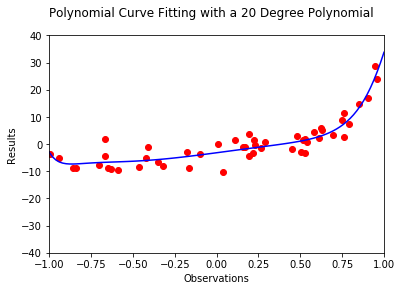

In [26]:
'''
This program has been specifically tailored to answer question 2 in assignment 1. Its methods
and classes are specifically tailored for this question, however, I have tried to make them
as abstract as possible for other similar programming needs.
'''
import matplotlib.pyplot as plt
import numpy as np

TRAINING_DATA = None
VALIDATION_DATA = None
TEST_DATA = None

class DataSet():
    def __init__(self,inp,out):
        self.x = inp
        self.y = out

class PolynomialMaster():
    '''
    This class can be used to generate the best polynomial fits for a line
    '''

    def __init__(self,dataset):
        self.dataset = dataset

    def get_best_fit(self,degree):
        '''
        Using the initialized data set this method finds the best fit polynomial
        of the specified n-th degree. It uses the least squares regression method
        and returns an array containing all the coefficients found with this method.
        '''
        rows = len(self.dataset.x)
        cols = degree + 1
        basis_array = np.zeros((rows, cols))

        for i in range(0, rows):
            for j in range(0, cols):
                basis_array[i][j] = PolynomialMaster.polynomial_basis_function(j, self.dataset.x[i])

        mpps_of_basis = np.linalg.pinv(basis_array)

        return np.matmul(mpps_of_basis,np.array(self.dataset.y))

    def get_best_fit_l2(self,degree,lambda_val):
        rows = len(self.dataset.x)
        cols = degree + 1
        basis_array = np.zeros((rows, cols))

        for i in range(0, rows):
            for j in range(0, cols):
                basis_array[i][j] = PolynomialMaster.polynomial_basis_function(j, self.dataset.x[i])

        # output = np.matmul(basis_array.transpose(),basis_array)
        # output = output + (lambda_val * np.identity(cols))
        # output = np.linalg.inv(output)

        output = np.linalg.inv((np.matmul(basis_array.transpose(),basis_array)+(lambda_val * np.identity(cols))))
        output = np.matmul(np.matmul(output,basis_array.transpose()),self.dataset.y)
        return output

    @staticmethod
    def get_mean_squared_error(target_values, predictions):
        output = 0
        num_predictions = len(predictions)
        for i in range(0, num_predictions):
            output += ((target_values[i] - predictions[i]) ** 2)

        return (output / num_predictions)

    @staticmethod
    def get_polynomial_output(x,coefficients):
        '''
        Returns the output of the polynomial for a given x and its coefficients.
        The coefficients must be in ascending order
        '''
        degree = len(coefficients)

        output = 0
        for power in range(0, degree):
            output += coefficients[power] * (x ** power)

        return output

    @staticmethod
    def polynomial_basis_function(power, x):
        if power == 0:
            return 1
        else:
            return x**power

    @staticmethod
    def get_predictions(inputs,coefficients):
        predictions = []
        for input in inputs:
            predictions.append(PolynomialMaster.get_polynomial_output(input,coefficients))

        return predictions

class Plotter():
    def add_plot(self,x,y,plot_type='r.',label=None):
        if label:
            return plt.plot(x,y,plot_type,label)
        else:
            return plt.plot(x,y,plot_type)

    def add_best_fit_poly(self,coefficients,plot_type='b-',num_sample_points=100,range=(-1,1)):
        best_fit_x = np.linspace(range[0], range[1], num_sample_points)
        best_fit_y = PolynomialMaster.get_polynomial_output(best_fit_x, coefficients)
        plt.plot(best_fit_x,best_fit_y,plot_type)

    def set_axis(self,axis):
        plt.axis(axis)

    def set_xLabel(self,label):
        plt.xlabel(label)

    def set_yLabel(self,label):
        plt.ylabel(label)

    def set_main_title(self,title):
        plt.suptitle(title)

    def show(self):
        plt.show()

    def modify_legend(self,**kwargs):
        plt.legend(**kwargs)

def initialize_data():
    '''
    This method calls the read_data method and initializes the data into the empty variables
    created at the beginning of the program
    '''
    global TRAINING_DATA
    TRAINING_DATA = read_data("Datasets/Dataset_1_train.csv")
    global VALIDATION_DATA
    VALIDATION_DATA = read_data("Datasets/Dataset_1_valid.csv")
    global TEST_DATA
    TEST_DATA = read_data("Datasets/Dataset_1_test.csv")


def read_data(filename):
    inp = []
    out = []
    with open(filename, 'r') as f:
        for line in f:
            temp_line = line.split(',')
            inp.append(float(temp_line[0]))
            out.append(float(temp_line[1]))
    return DataSet(inp, out)

def divide_interval(interval,num_divisions,end_point_inclusive=True):
    '''
    This method takes in a tuple that represents an interval and returns a list with the given number
    of divisions. If the variable end_point_inclusive is set to true then the returned list has
    the end_point_included
    '''
    output = [interval[0]]
    if interval[0] < interval[1]:
        delta = (interval[1] - interval[0])/num_divisions
        point = interval[0] + delta
        while point < interval[1]:
            output.append(point)
            point+=delta

    if end_point_inclusive:
        output.append(interval[1])

    return output

def find_min(dict_in):
    '''
    Takes a dictionary as input and returns the key and val with the smallest value
    '''
    if len(dict_in) < 1:
        return None

    min_key = list(dict_in.keys())[0]
    min_value = dict_in[min_key]
    output = [min_key,min_value]

    for key,val in dict_in.items():
        if val < output[1]:
            output[0] = key
            output[1] = val

    return output



def run_part_1():
    #Initialize data, classes, and variables
    initialize_data()
    plotter = Plotter()
    degree = 20

    #Load training data into class and generate coefficients for best fit polynomial
    poly_master = PolynomialMaster(TRAINING_DATA)
    coefficients = poly_master.get_best_fit(degree)

    #Get Mean Squared Error with validation data
    training_predictions = poly_master.get_predictions(TRAINING_DATA.x, coefficients)
    validation_predictions = poly_master.get_predictions(VALIDATION_DATA.x, coefficients)
    training_mse = poly_master.get_mean_squared_error(TRAINING_DATA.y,training_predictions)
    validation_mse = poly_master.get_mean_squared_error(VALIDATION_DATA.y,validation_predictions)
    print("The Mean Squared Error for the Training Data using a degree {} polynomial fit is {}".format(degree,training_mse))
    print("The Mean Squared Error for the Validation Data using a degree {} polynomial fit is {}".format(degree,validation_mse))

    plotter.add_plot(TRAINING_DATA.x,TRAINING_DATA.y,'ro')
    plotter.add_best_fit_poly(coefficients)
    plotter.set_axis([-1,1,-40,40])
    plotter.set_xLabel("Observations")
    plotter.set_yLabel("Results")
    plotter.set_main_title("Polynomial Curve Fitting with a {} Degree Polynomial".format(degree))
    plotter.show()


def run_part_2_a():
    # Initialize data, classes, and variables
    initialize_data()
    plotter = Plotter()
    degree = 20
    lambda_divisions = 100
    mse_training = {}
    mse_validation = {}

    poly_master = PolynomialMaster(TRAINING_DATA)

    lambda_values = divide_interval([0,1],lambda_divisions,True)
    for val in lambda_values:
        coefficients = poly_master.get_best_fit_l2(degree,val)
        training_predictions = poly_master.get_predictions(TRAINING_DATA.x,coefficients)
        validation_predictions = poly_master.get_predictions(VALIDATION_DATA.x,coefficients)

        mse_training[val] = poly_master.get_mean_squared_error(TRAINING_DATA.y,training_predictions)
        mse_validation[val] = poly_master.get_mean_squared_error(VALIDATION_DATA.y,validation_predictions)


    plot1, = plt.plot(mse_training.keys(),mse_training.values(),'b-',label="Training Data MSE")
    plot2, = plt.plot(mse_validation.keys(),mse_validation.values(),'r-',label="Validation Data MSE")
    plotter.set_axis([0,1,0,15])
    plotter.set_xLabel("Lambda Values")
    plotter.set_yLabel("Mean Squared Error")
    plotter.set_main_title("Mean Squared Error Values for Different Lambda Values")
    plotter.modify_legend()
    plotter.show()

def run_part_2_b():
    # Initialize data, classes, and variables
    initialize_data()
    plotter = Plotter()
    degree = 20

    lambda_divisions = 100
    mse_training = {}
    mse_validation = {}

    poly_master = PolynomialMaster(TRAINING_DATA)

    lambda_values = divide_interval([0, 1], lambda_divisions, True)
    for val in lambda_values:
        coefficients = poly_master.get_best_fit_l2(degree, val)
        training_predictions = poly_master.get_predictions(TRAINING_DATA.x, coefficients)
        validation_predictions = poly_master.get_predictions(VALIDATION_DATA.x, coefficients)

        mse_training[val] = poly_master.get_mean_squared_error(TRAINING_DATA.y, training_predictions)
        mse_validation[val] = poly_master.get_mean_squared_error(VALIDATION_DATA.y, validation_predictions)

    smallest_mse= find_min(mse_validation)
    print("The smallest mean squared error found for the validation "
          "data is {} with lambda value = {}".format(smallest_mse[1],smallest_mse[0]))

def run_part_2_c(lambda_val):
    # Initialize data, classes, and variables
    initialize_data()
    plotter = Plotter()
    degree = 20

    # Load training data into class and generate coefficients for best fit polynomial
    poly_master = PolynomialMaster(TRAINING_DATA)
    coefficients = poly_master.get_best_fit_l2(degree,lambda_val=lambda_val)

    plotter.add_plot(TRAINING_DATA.x, TRAINING_DATA.y, 'ro')
    plotter.add_best_fit_poly(coefficients)
    plotter.set_axis([-1, 1, -40, 40])
    plotter.set_xLabel("Observations")
    plotter.set_yLabel("Results")
    plotter.set_main_title("Polynomial Curve Fitting with a {} Degree Polynomial".format(degree))
    plotter.show()


if __name__ == "__main__":
    run_part_2_c(0.02)

* * *
### Part 3 - Gradient Descent For Regression
#### Question 1
##### a)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from random import random

TRAINING_DATA = None
VALIDATION_DATA = None
TEST_DATA = None

import matplotlib.pyplot as plt
import numpy as np

TRAINING_DATA = None
VALIDATION_DATA = None
TEST_DATA = None

class DataSet():
    def __init__(self,inp,out):
        self.x = inp
        self.y = out


def get_mean_squared_error(target_values, predictions):
    output = 0
    num_predictions = len(predictions)
    for i in range(0, num_predictions):
        output += ((target_values[i] - predictions[i]) ** 2)

    return (output / num_predictions)


def get_polynomial_output(x,coefficients):
    '''
    Returns the output of the polynomial for a given x and its coefficients.
    The coefficients must be in ascending order
    '''
    degree = len(coefficients)

    output = 0
    for power in range(0, degree):
        output += coefficients[power] * (x ** power)

    return output

def get_predictions(inputs,coefficients):
    predictions = []
    for input in inputs:
        predictions.append(get_polynomial_output(input,coefficients))

    return predictions


def stochastic_gradient_descent(dataset,parameters,step_size,num_epochs):
    param_data = []

    num_points = len(dataset.x)
    data_array = np.zeros((num_points,2))       #numpy 2D array to hold given dataset

    #This is a N*2 matrix where N is the number of data points. Each row contains the x and y values in that order
    for point in range(0,num_points):
        data_array[point][0] = dataset.x[point]
        data_array[point][1] = dataset.y[point]

    for i in range(0,num_epochs):
        temp_data_array = np.copy(data_array)
        np.random.shuffle(temp_data_array)
        for j in range(0,num_points):
            x = temp_data_array[j][0]
            y = temp_data_array[j][1]
            prediction = get_predictions([x],parameters)[0]

            parameters[0] = parameters[0] - step_size*(prediction - y)
            parameters[1] = parameters[1] - step_size*(prediction - y)*x

        param_data.append([parameters[0], parameters[1]])
    return param_data


def initialize_data():
    '''
    This method calls the read_data method and initializes the data into the empty variables
    created at the beginning of the program
    '''
    global TRAINING_DATA
    TRAINING_DATA = read_data("Datasets/Dataset_2_train.csv")
    global VALIDATION_DATA
    VALIDATION_DATA = read_data("Datasets/Dataset_2_valid.csv")
    global TEST_DATA
    TEST_DATA = read_data("Datasets/Dataset_2_test.csv")


def read_data(filename):
    inp = []
    out = []
    with open(filename, 'r') as f:
        for line in f:
            temp_line = line.split(',')
            inp.append(float(temp_line[0]))
            out.append(float(temp_line[1]))
    return DataSet(inp, out)

def run_q1_a():
    initialize_data()
    initial_params = [random(),random()]
    step_size = 10**(-6)
    num_epochs = 10000

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0],initial_params[1]))
    print("The step size is set to {}".format((step_size)))
    print("The number of epochs is set to {} ".format(num_epochs))

    parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                parameters=initial_params,
                                step_size=step_size,
                                num_epochs=num_epochs)

    epochs = []
    mse_array = []
    for i in range(0,num_epochs):
        predictions = get_predictions(VALIDATION_DATA.x,parameters[i])
        mse = get_mean_squared_error(VALIDATION_DATA.y,predictions)
        mse_array.append(mse)
        epochs.append(i+1)

    print("The MSE for the last epoch of {} is {}".format(num_epochs,mse_array[-1]))

    plt.plot(epochs,mse_array,'b-')
    plt.suptitle("Mean Squared Error For Parameters Generated at Each Epoch")
    plt.xlabel("Epoch Number")
    plt.ylabel("Mean Squared Error")
    plt.show()

def run_q1_b():
    initialize_data()
    initial_params = [random(), random()]
    step_size = 10 ** (-6)
    num_epochs = 10000

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0], initial_params[1]))
    print("The step size is set to {}".format((step_size)))
    print("The number of epochs is set to {} ".format(num_epochs))

    parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                             parameters=initial_params,
                                             step_size=step_size,
                                             num_epochs=num_epochs)

    epochs = []
    training_mse_array = []
    validation_mse_array = []
    for i in range(0, num_epochs):
        training_predictions = get_predictions(TRAINING_DATA.x,parameters[i])
        validation_predictions = get_predictions(VALIDATION_DATA.x, parameters[i])

        training_mse = get_mean_squared_error(TRAINING_DATA.y,training_predictions)
        validation_mse = get_mean_squared_error(VALIDATION_DATA.y, validation_predictions)

        training_mse_array.append(training_mse)
        validation_mse_array.append(validation_mse)

        epochs.append(i + 1)

    plt1, = plt.plot(epochs, training_mse_array, 'b-',label="Training MSE")
    plt2, = plt.plot(epochs,validation_mse_array,'r-',label="Validation MSE")
    plt.suptitle("Mean Squared Error For Parameters Generated at Each Epoch")
    plt.xlabel("Epoch Number")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.show()

def run_q2_a():
    initialize_data()
    initial_params = [random(), random()]
    num_epochs = 10000

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0], initial_params[1]))
    print("The number of epochs is set to {} ".format(num_epochs))

    for power in range(0,10):
        step_size = 10**(-power)
        print("Setting step size to {}".format(step_size))

        parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                             parameters=initial_params,
                                             step_size=step_size,
                                             num_epochs=num_epochs)

        final_parameters = parameters[-1]
        predictions = get_predictions(VALIDATION_DATA.x,final_parameters)
        mse = get_mean_squared_error(VALIDATION_DATA.y,predictions)

        print("For step size {}, after {} epochs, the MSE with Validation Data is {}".format(step_size, num_epochs, mse))

def run_q2_b():
    initialize_data()
    initial_params = [random(), random()]
    num_epochs = 10000
    step_size = 0.01

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0], initial_params[1]))
    print("The number of epochs is set to {} ".format(num_epochs))
    print("The step size is set to {}".format(step_size))

    parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                         parameters=initial_params,
                                         step_size=step_size,
                                         num_epochs=num_epochs)

    final_parameters = parameters[-1]
    predictions = get_predictions(TEST_DATA.x,final_parameters)
    mse = get_mean_squared_error(TEST_DATA.y,predictions)

    print("For step size {}, after {} epochs, the MSE with Test Data is {}".format(step_size, num_epochs, mse))

def run_q3():
    initialize_data()
    initial_params = [random(), random()]
    step_size = 0.01
    num_epochs = 10000
    range = [0,1.5]
    num_sample_points = 150
    random_5_epochs = (10,500,2000,5000,9000)

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0], initial_params[1]))
    print("The step size is set to {}".format((step_size)))
    print("The number of epochs is set to {} ".format(num_epochs))

    parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                             parameters=initial_params,
                                             step_size=step_size,
                                             num_epochs=num_epochs)

    plot_index = 321
    for epoch in random_5_epochs:
        plt.subplot(plot_index)
        plt1, = plt.plot(TEST_DATA.x,TEST_DATA.y,'r.',label="Test Data")

        best_fit_x = np.linspace(range[0],range[1],num_sample_points)
        best_fit_y = get_polynomial_output(best_fit_x,parameters[epoch+1])

        plt2, = plt.plot(best_fit_x,best_fit_y,'b-',label="Regression Fit")

        plt.legend()
        plt.title("Fit for Epoch {}".format(epoch))

        plot_index+=1

    plt.subplots_adjust(wspace=0.4,hspace=0.5)
    plt.show()


if __name__ == "__main__":
    run_q1_a()

The data has been initialized: 
The initial parameters are set to (0.457665570248999,0.0897154297463858) 
The step size is set to 1e-06
The number of epochs is set to 10000 
The MSE for the last epoch of 10000 is 0.19608486965211275


<Figure size 640x480 with 1 Axes>

##### b)

The data has been initialized: 
The initial parameters are set to (0.07642092956664504,0.80397616724715) 
The step size is set to 1e-06
The number of epochs is set to 10000 


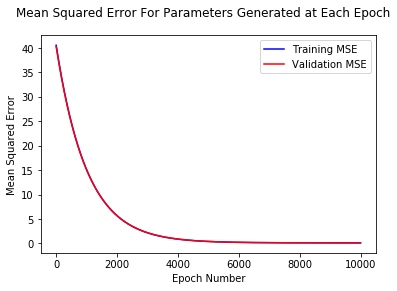

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from random import random

TRAINING_DATA = None
VALIDATION_DATA = None
TEST_DATA = None

import matplotlib.pyplot as plt
import numpy as np

TRAINING_DATA = None
VALIDATION_DATA = None
TEST_DATA = None

class DataSet():
    def __init__(self,inp,out):
        self.x = inp
        self.y = out


def get_mean_squared_error(target_values, predictions):
    output = 0
    num_predictions = len(predictions)
    for i in range(0, num_predictions):
        output += ((target_values[i] - predictions[i]) ** 2)

    return (output / num_predictions)


def get_polynomial_output(x,coefficients):
    '''
    Returns the output of the polynomial for a given x and its coefficients.
    The coefficients must be in ascending order
    '''
    degree = len(coefficients)

    output = 0
    for power in range(0, degree):
        output += coefficients[power] * (x ** power)

    return output

def get_predictions(inputs,coefficients):
    predictions = []
    for input in inputs:
        predictions.append(get_polynomial_output(input,coefficients))

    return predictions


def stochastic_gradient_descent(dataset,parameters,step_size,num_epochs):
    param_data = []

    num_points = len(dataset.x)
    data_array = np.zeros((num_points,2))       #numpy 2D array to hold given dataset

    #This is a N*2 matrix where N is the number of data points. Each row contains the x and y values in that order
    for point in range(0,num_points):
        data_array[point][0] = dataset.x[point]
        data_array[point][1] = dataset.y[point]

    for i in range(0,num_epochs):
        temp_data_array = np.copy(data_array)
        np.random.shuffle(temp_data_array)
        for j in range(0,num_points):
            x = temp_data_array[j][0]
            y = temp_data_array[j][1]
            prediction = get_predictions([x],parameters)[0]

            parameters[0] = parameters[0] - step_size*(prediction - y)
            parameters[1] = parameters[1] - step_size*(prediction - y)*x

        param_data.append([parameters[0], parameters[1]])
    return param_data


def initialize_data():
    '''
    This method calls the read_data method and initializes the data into the empty variables
    created at the beginning of the program
    '''
    global TRAINING_DATA
    TRAINING_DATA = read_data("Datasets/Dataset_2_train.csv")
    global VALIDATION_DATA
    VALIDATION_DATA = read_data("Datasets/Dataset_2_valid.csv")
    global TEST_DATA
    TEST_DATA = read_data("Datasets/Dataset_2_test.csv")


def read_data(filename):
    inp = []
    out = []
    with open(filename, 'r') as f:
        for line in f:
            temp_line = line.split(',')
            inp.append(float(temp_line[0]))
            out.append(float(temp_line[1]))
    return DataSet(inp, out)

def run_q1_a():
    initialize_data()
    initial_params = [random(),random()]
    step_size = 10**(-6)
    num_epochs = 10000

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0],initial_params[1]))
    print("The step size is set to {}".format((step_size)))
    print("The number of epochs is set to {} ".format(num_epochs))

    parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                parameters=initial_params,
                                step_size=step_size,
                                num_epochs=num_epochs)

    epochs = []
    mse_array = []
    for i in range(0,num_epochs):
        predictions = get_predictions(VALIDATION_DATA.x,parameters[i])
        mse = get_mean_squared_error(VALIDATION_DATA.y,predictions)
        mse_array.append(mse)
        epochs.append(i+1)

    print("The MSE for the last epoch of {} is {}".format(num_epochs,mse_array[-1]))

    plt.plot(epochs,mse_array,'b-')
    plt.suptitle("Mean Squared Error For Parameters Generated at Each Epoch")
    plt.xlabel("Epoch Number")
    plt.ylabel("Mean Squared Error")
    plt.show()

def run_q1_b():
    initialize_data()
    initial_params = [random(), random()]
    step_size = 10 ** (-6)
    num_epochs = 10000

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0], initial_params[1]))
    print("The step size is set to {}".format((step_size)))
    print("The number of epochs is set to {} ".format(num_epochs))

    parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                             parameters=initial_params,
                                             step_size=step_size,
                                             num_epochs=num_epochs)

    epochs = []
    training_mse_array = []
    validation_mse_array = []
    for i in range(0, num_epochs):
        training_predictions = get_predictions(TRAINING_DATA.x,parameters[i])
        validation_predictions = get_predictions(VALIDATION_DATA.x, parameters[i])

        training_mse = get_mean_squared_error(TRAINING_DATA.y,training_predictions)
        validation_mse = get_mean_squared_error(VALIDATION_DATA.y, validation_predictions)

        training_mse_array.append(training_mse)
        validation_mse_array.append(validation_mse)

        epochs.append(i + 1)

    plt1, = plt.plot(epochs, training_mse_array, 'b-',label="Training MSE")
    plt2, = plt.plot(epochs,validation_mse_array,'r-',label="Validation MSE")
    plt.suptitle("Mean Squared Error For Parameters Generated at Each Epoch")
    plt.xlabel("Epoch Number")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.show()

def run_q2_a():
    initialize_data()
    initial_params = [random(), random()]
    num_epochs = 10000

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0], initial_params[1]))
    print("The number of epochs is set to {} ".format(num_epochs))

    for power in range(0,10):
        step_size = 10**(-power)
        print("Setting step size to {}".format(step_size))

        parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                             parameters=initial_params,
                                             step_size=step_size,
                                             num_epochs=num_epochs)

        final_parameters = parameters[-1]
        predictions = get_predictions(VALIDATION_DATA.x,final_parameters)
        mse = get_mean_squared_error(VALIDATION_DATA.y,predictions)

        print("For step size {}, after {} epochs, the MSE with Validation Data is {}".format(step_size, num_epochs, mse))

def run_q2_b():
    initialize_data()
    initial_params = [random(), random()]
    num_epochs = 10000
    step_size = 0.01

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0], initial_params[1]))
    print("The number of epochs is set to {} ".format(num_epochs))
    print("The step size is set to {}".format(step_size))

    parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                         parameters=initial_params,
                                         step_size=step_size,
                                         num_epochs=num_epochs)

    final_parameters = parameters[-1]
    predictions = get_predictions(TEST_DATA.x,final_parameters)
    mse = get_mean_squared_error(TEST_DATA.y,predictions)

    print("For step size {}, after {} epochs, the MSE with Test Data is {}".format(step_size, num_epochs, mse))

def run_q3():
    initialize_data()
    initial_params = [random(), random()]
    step_size = 0.01
    num_epochs = 10000
    range = [0,1.5]
    num_sample_points = 150
    random_5_epochs = (10,500,2000,5000,9000)

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0], initial_params[1]))
    print("The step size is set to {}".format((step_size)))
    print("The number of epochs is set to {} ".format(num_epochs))

    parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                             parameters=initial_params,
                                             step_size=step_size,
                                             num_epochs=num_epochs)

    plot_index = 321
    for epoch in random_5_epochs:
        plt.subplot(plot_index)
        plt1, = plt.plot(TEST_DATA.x,TEST_DATA.y,'r.',label="Test Data")

        best_fit_x = np.linspace(range[0],range[1],num_sample_points)
        best_fit_y = get_polynomial_output(best_fit_x,parameters[epoch+1])

        plt2, = plt.plot(best_fit_x,best_fit_y,'b-',label="Regression Fit")

        plt.legend()
        plt.title("Fit for Epoch {}".format(epoch))

        plot_index+=1

    plt.subplots_adjust(wspace=0.4,hspace=0.5)
    plt.show()


if __name__ == "__main__":
    run_q1_b()

#### Q2)
##### a)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from random import random

TRAINING_DATA = None
VALIDATION_DATA = None
TEST_DATA = None

import matplotlib.pyplot as plt
import numpy as np

TRAINING_DATA = None
VALIDATION_DATA = None
TEST_DATA = None

class DataSet():
    def __init__(self,inp,out):
        self.x = inp
        self.y = out


def get_mean_squared_error(target_values, predictions):
    output = 0
    num_predictions = len(predictions)
    for i in range(0, num_predictions):
        output += ((target_values[i] - predictions[i]) ** 2)

    return (output / num_predictions)


def get_polynomial_output(x,coefficients):
    '''
    Returns the output of the polynomial for a given x and its coefficients.
    The coefficients must be in ascending order
    '''
    degree = len(coefficients)

    output = 0
    for power in range(0, degree):
        output += coefficients[power] * (x ** power)

    return output

def get_predictions(inputs,coefficients):
    predictions = []
    for input in inputs:
        predictions.append(get_polynomial_output(input,coefficients))

    return predictions


def stochastic_gradient_descent(dataset,parameters,step_size,num_epochs):
    param_data = []

    num_points = len(dataset.x)
    data_array = np.zeros((num_points,2))       #numpy 2D array to hold given dataset

    #This is a N*2 matrix where N is the number of data points. Each row contains the x and y values in that order
    for point in range(0,num_points):
        data_array[point][0] = dataset.x[point]
        data_array[point][1] = dataset.y[point]

    for i in range(0,num_epochs):
        temp_data_array = np.copy(data_array)
        np.random.shuffle(temp_data_array)
        for j in range(0,num_points):
            x = temp_data_array[j][0]
            y = temp_data_array[j][1]
            prediction = get_predictions([x],parameters)[0]

            parameters[0] = parameters[0] - step_size*(prediction - y)
            parameters[1] = parameters[1] - step_size*(prediction - y)*x

        param_data.append([parameters[0], parameters[1]])
    return param_data


def initialize_data():
    '''
    This method calls the read_data method and initializes the data into the empty variables
    created at the beginning of the program
    '''
    global TRAINING_DATA
    TRAINING_DATA = read_data("Datasets/Dataset_2_train.csv")
    global VALIDATION_DATA
    VALIDATION_DATA = read_data("Datasets/Dataset_2_valid.csv")
    global TEST_DATA
    TEST_DATA = read_data("Datasets/Dataset_2_test.csv")


def read_data(filename):
    inp = []
    out = []
    with open(filename, 'r') as f:
        for line in f:
            temp_line = line.split(',')
            inp.append(float(temp_line[0]))
            out.append(float(temp_line[1]))
    return DataSet(inp, out)

def run_q1_a():
    initialize_data()
    initial_params = [random(),random()]
    step_size = 10**(-6)
    num_epochs = 10000

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0],initial_params[1]))
    print("The step size is set to {}".format((step_size)))
    print("The number of epochs is set to {} ".format(num_epochs))

    parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                parameters=initial_params,
                                step_size=step_size,
                                num_epochs=num_epochs)

    epochs = []
    mse_array = []
    for i in range(0,num_epochs):
        predictions = get_predictions(VALIDATION_DATA.x,parameters[i])
        mse = get_mean_squared_error(VALIDATION_DATA.y,predictions)
        mse_array.append(mse)
        epochs.append(i+1)

    print("The MSE for the last epoch of {} is {}".format(num_epochs,mse_array[-1]))

    plt.plot(epochs,mse_array,'b-')
    plt.suptitle("Mean Squared Error For Parameters Generated at Each Epoch")
    plt.xlabel("Epoch Number")
    plt.ylabel("Mean Squared Error")
    plt.show()

def run_q1_b():
    initialize_data()
    initial_params = [random(), random()]
    step_size = 10 ** (-6)
    num_epochs = 10000

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0], initial_params[1]))
    print("The step size is set to {}".format((step_size)))
    print("The number of epochs is set to {} ".format(num_epochs))

    parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                             parameters=initial_params,
                                             step_size=step_size,
                                             num_epochs=num_epochs)

    epochs = []
    training_mse_array = []
    validation_mse_array = []
    for i in range(0, num_epochs):
        training_predictions = get_predictions(TRAINING_DATA.x,parameters[i])
        validation_predictions = get_predictions(VALIDATION_DATA.x, parameters[i])

        training_mse = get_mean_squared_error(TRAINING_DATA.y,training_predictions)
        validation_mse = get_mean_squared_error(VALIDATION_DATA.y, validation_predictions)

        training_mse_array.append(training_mse)
        validation_mse_array.append(validation_mse)

        epochs.append(i + 1)

    plt1, = plt.plot(epochs, training_mse_array, 'b-',label="Training MSE")
    plt2, = plt.plot(epochs,validation_mse_array,'r-',label="Validation MSE")
    plt.suptitle("Mean Squared Error For Parameters Generated at Each Epoch")
    plt.xlabel("Epoch Number")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.show()

def run_q2_a():
    initialize_data()
    initial_params = [random(), random()]
    num_epochs = 10000

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0], initial_params[1]))
    print("The number of epochs is set to {} ".format(num_epochs))

    for power in range(0,10):
        step_size = 10**(-power)
        print("Setting step size to {}".format(step_size))

        parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                             parameters=initial_params,
                                             step_size=step_size,
                                             num_epochs=num_epochs)

        final_parameters = parameters[-1]
        predictions = get_predictions(VALIDATION_DATA.x,final_parameters)
        mse = get_mean_squared_error(VALIDATION_DATA.y,predictions)

        print("For step size {}, after {} epochs, the MSE with Validation Data is {}".format(step_size, num_epochs, mse))

def run_q2_b():
    initialize_data()
    initial_params = [random(), random()]
    num_epochs = 10000
    step_size = 0.01

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0], initial_params[1]))
    print("The number of epochs is set to {} ".format(num_epochs))
    print("The step size is set to {}".format(step_size))

    parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                         parameters=initial_params,
                                         step_size=step_size,
                                         num_epochs=num_epochs)

    final_parameters = parameters[-1]
    predictions = get_predictions(TEST_DATA.x,final_parameters)
    mse = get_mean_squared_error(TEST_DATA.y,predictions)

    print("For step size {}, after {} epochs, the MSE with Test Data is {}".format(step_size, num_epochs, mse))

def run_q3():
    initialize_data()
    initial_params = [random(), random()]
    step_size = 0.01
    num_epochs = 10000
    range = [0,1.5]
    num_sample_points = 150
    random_5_epochs = (10,500,2000,5000,9000)

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0], initial_params[1]))
    print("The step size is set to {}".format((step_size)))
    print("The number of epochs is set to {} ".format(num_epochs))

    parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                             parameters=initial_params,
                                             step_size=step_size,
                                             num_epochs=num_epochs)

    plot_index = 321
    for epoch in random_5_epochs:
        plt.subplot(plot_index)
        plt1, = plt.plot(TEST_DATA.x,TEST_DATA.y,'r.',label="Test Data")

        best_fit_x = np.linspace(range[0],range[1],num_sample_points)
        best_fit_y = get_polynomial_output(best_fit_x,parameters[epoch+1])

        plt2, = plt.plot(best_fit_x,best_fit_y,'b-',label="Regression Fit")

        plt.legend()
        plt.title("Fit for Epoch {}".format(epoch))

        plot_index+=1

    plt.subplots_adjust(wspace=0.4,hspace=0.5)
    plt.show()


if __name__ == "__main__":
    run_q2_a()

The data has been initialized: 
The initial parameters are set to (0.8060873905400328,0.20624270313941784) 
The number of epochs is set to 10000 
Setting step size to 1
For step size 1, after 10000 epochs, the MSE with Validation Data is 0.9327286933167278
Setting step size to 0.1
For step size 0.1, after 10000 epochs, the MSE with Validation Data is 0.10295043023432919
Setting step size to 0.01
For step size 0.01, after 10000 epochs, the MSE with Validation Data is 0.07383937311188904
Setting step size to 0.001
For step size 0.001, after 10000 epochs, the MSE with Validation Data is 0.07407900760914185
Setting step size to 0.0001
For step size 0.0001, after 10000 epochs, the MSE with Validation Data is 0.07407076424364561
Setting step size to 1e-05
For step size 1e-05, after 10000 epochs, the MSE with Validation Data is 0.07407031505064336
Setting step size to 1e-06
For step size 1e-06, after 10000 epochs, the MSE with Validation Data is 0.07407037629133449
Setting step size to 1e-07


##### b)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from random import random

TRAINING_DATA = None
VALIDATION_DATA = None
TEST_DATA = None

import matplotlib.pyplot as plt
import numpy as np

TRAINING_DATA = None
VALIDATION_DATA = None
TEST_DATA = None

class DataSet():
    def __init__(self,inp,out):
        self.x = inp
        self.y = out


def get_mean_squared_error(target_values, predictions):
    output = 0
    num_predictions = len(predictions)
    for i in range(0, num_predictions):
        output += ((target_values[i] - predictions[i]) ** 2)

    return (output / num_predictions)


def get_polynomial_output(x,coefficients):
    '''
    Returns the output of the polynomial for a given x and its coefficients.
    The coefficients must be in ascending order
    '''
    degree = len(coefficients)

    output = 0
    for power in range(0, degree):
        output += coefficients[power] * (x ** power)

    return output

def get_predictions(inputs,coefficients):
    predictions = []
    for input in inputs:
        predictions.append(get_polynomial_output(input,coefficients))

    return predictions


def stochastic_gradient_descent(dataset,parameters,step_size,num_epochs):
    param_data = []

    num_points = len(dataset.x)
    data_array = np.zeros((num_points,2))       #numpy 2D array to hold given dataset

    #This is a N*2 matrix where N is the number of data points. Each row contains the x and y values in that order
    for point in range(0,num_points):
        data_array[point][0] = dataset.x[point]
        data_array[point][1] = dataset.y[point]

    for i in range(0,num_epochs):
        temp_data_array = np.copy(data_array)
        np.random.shuffle(temp_data_array)
        for j in range(0,num_points):
            x = temp_data_array[j][0]
            y = temp_data_array[j][1]
            prediction = get_predictions([x],parameters)[0]

            parameters[0] = parameters[0] - step_size*(prediction - y)
            parameters[1] = parameters[1] - step_size*(prediction - y)*x

        param_data.append([parameters[0], parameters[1]])
    return param_data


def initialize_data():
    '''
    This method calls the read_data method and initializes the data into the empty variables
    created at the beginning of the program
    '''
    global TRAINING_DATA
    TRAINING_DATA = read_data("Datasets/Dataset_2_train.csv")
    global VALIDATION_DATA
    VALIDATION_DATA = read_data("Datasets/Dataset_2_valid.csv")
    global TEST_DATA
    TEST_DATA = read_data("Datasets/Dataset_2_test.csv")


def read_data(filename):
    inp = []
    out = []
    with open(filename, 'r') as f:
        for line in f:
            temp_line = line.split(',')
            inp.append(float(temp_line[0]))
            out.append(float(temp_line[1]))
    return DataSet(inp, out)

def run_q1_a():
    initialize_data()
    initial_params = [random(),random()]
    step_size = 10**(-6)
    num_epochs = 10000

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0],initial_params[1]))
    print("The step size is set to {}".format((step_size)))
    print("The number of epochs is set to {} ".format(num_epochs))

    parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                parameters=initial_params,
                                step_size=step_size,
                                num_epochs=num_epochs)

    epochs = []
    mse_array = []
    for i in range(0,num_epochs):
        predictions = get_predictions(VALIDATION_DATA.x,parameters[i])
        mse = get_mean_squared_error(VALIDATION_DATA.y,predictions)
        mse_array.append(mse)
        epochs.append(i+1)

    print("The MSE for the last epoch of {} is {}".format(num_epochs,mse_array[-1]))

    plt.plot(epochs,mse_array,'b-')
    plt.suptitle("Mean Squared Error For Parameters Generated at Each Epoch")
    plt.xlabel("Epoch Number")
    plt.ylabel("Mean Squared Error")
    plt.show()

def run_q1_b():
    initialize_data()
    initial_params = [random(), random()]
    step_size = 10 ** (-6)
    num_epochs = 10000

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0], initial_params[1]))
    print("The step size is set to {}".format((step_size)))
    print("The number of epochs is set to {} ".format(num_epochs))

    parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                             parameters=initial_params,
                                             step_size=step_size,
                                             num_epochs=num_epochs)

    epochs = []
    training_mse_array = []
    validation_mse_array = []
    for i in range(0, num_epochs):
        training_predictions = get_predictions(TRAINING_DATA.x,parameters[i])
        validation_predictions = get_predictions(VALIDATION_DATA.x, parameters[i])

        training_mse = get_mean_squared_error(TRAINING_DATA.y,training_predictions)
        validation_mse = get_mean_squared_error(VALIDATION_DATA.y, validation_predictions)

        training_mse_array.append(training_mse)
        validation_mse_array.append(validation_mse)

        epochs.append(i + 1)

    plt1, = plt.plot(epochs, training_mse_array, 'b-',label="Training MSE")
    plt2, = plt.plot(epochs,validation_mse_array,'r-',label="Validation MSE")
    plt.suptitle("Mean Squared Error For Parameters Generated at Each Epoch")
    plt.xlabel("Epoch Number")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.show()

def run_q2_a():
    initialize_data()
    initial_params = [random(), random()]
    num_epochs = 10000

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0], initial_params[1]))
    print("The number of epochs is set to {} ".format(num_epochs))

    for power in range(0,10):
        step_size = 10**(-power)
        print("Setting step size to {}".format(step_size))

        parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                             parameters=initial_params,
                                             step_size=step_size,
                                             num_epochs=num_epochs)

        final_parameters = parameters[-1]
        predictions = get_predictions(VALIDATION_DATA.x,final_parameters)
        mse = get_mean_squared_error(VALIDATION_DATA.y,predictions)

        print("For step size {}, after {} epochs, the MSE with Validation Data is {}".format(step_size, num_epochs, mse))

def run_q2_b():
    initialize_data()
    initial_params = [random(), random()]
    num_epochs = 10000
    step_size = 0.01

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0], initial_params[1]))
    print("The number of epochs is set to {} ".format(num_epochs))
    print("The step size is set to {}".format(step_size))

    parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                         parameters=initial_params,
                                         step_size=step_size,
                                         num_epochs=num_epochs)

    final_parameters = parameters[-1]
    predictions = get_predictions(TEST_DATA.x,final_parameters)
    mse = get_mean_squared_error(TEST_DATA.y,predictions)

    print("For step size {}, after {} epochs, the MSE with Test Data is {}".format(step_size, num_epochs, mse))

def run_q3():
    initialize_data()
    initial_params = [random(), random()]
    step_size = 0.01
    num_epochs = 10000
    range = [0,1.5]
    num_sample_points = 150
    random_5_epochs = (10,500,2000,5000,9000)

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0], initial_params[1]))
    print("The step size is set to {}".format((step_size)))
    print("The number of epochs is set to {} ".format(num_epochs))

    parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                             parameters=initial_params,
                                             step_size=step_size,
                                             num_epochs=num_epochs)

    plot_index = 321
    for epoch in random_5_epochs:
        plt.subplot(plot_index)
        plt1, = plt.plot(TEST_DATA.x,TEST_DATA.y,'r.',label="Test Data")

        best_fit_x = np.linspace(range[0],range[1],num_sample_points)
        best_fit_y = get_polynomial_output(best_fit_x,parameters[epoch+1])

        plt2, = plt.plot(best_fit_x,best_fit_y,'b-',label="Regression Fit")

        plt.legend()
        plt.title("Fit for Epoch {}".format(epoch))

        plot_index+=1

    plt.subplots_adjust(wspace=0.4,hspace=0.5)
    plt.show()


if __name__ == "__main__":
    run_q2_b()

The data has been initialized: 
The initial parameters are set to (0.12762137569364174,0.8825862396149773) 
The number of epochs is set to 10000 
The step size is set to 0.01
For step size 0.01, after 10000 epochs, the MSE with Test Data is 0.07088041944135273


#### Q3)

The data has been initialized: 
The initial parameters are set to (0.5430241351980879,0.9957620591822134) 
The step size is set to 0.01
The number of epochs is set to 10000 


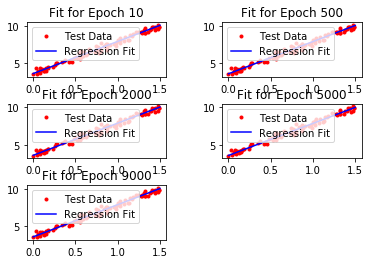

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from random import random

TRAINING_DATA = None
VALIDATION_DATA = None
TEST_DATA = None

import matplotlib.pyplot as plt
import numpy as np

TRAINING_DATA = None
VALIDATION_DATA = None
TEST_DATA = None

class DataSet():
    def __init__(self,inp,out):
        self.x = inp
        self.y = out


def get_mean_squared_error(target_values, predictions):
    output = 0
    num_predictions = len(predictions)
    for i in range(0, num_predictions):
        output += ((target_values[i] - predictions[i]) ** 2)

    return (output / num_predictions)


def get_polynomial_output(x,coefficients):
    '''
    Returns the output of the polynomial for a given x and its coefficients.
    The coefficients must be in ascending order
    '''
    degree = len(coefficients)

    output = 0
    for power in range(0, degree):
        output += coefficients[power] * (x ** power)

    return output

def get_predictions(inputs,coefficients):
    predictions = []
    for input in inputs:
        predictions.append(get_polynomial_output(input,coefficients))

    return predictions


def stochastic_gradient_descent(dataset,parameters,step_size,num_epochs):
    param_data = []

    num_points = len(dataset.x)
    data_array = np.zeros((num_points,2))       #numpy 2D array to hold given dataset

    #This is a N*2 matrix where N is the number of data points. Each row contains the x and y values in that order
    for point in range(0,num_points):
        data_array[point][0] = dataset.x[point]
        data_array[point][1] = dataset.y[point]

    for i in range(0,num_epochs):
        temp_data_array = np.copy(data_array)
        np.random.shuffle(temp_data_array)
        for j in range(0,num_points):
            x = temp_data_array[j][0]
            y = temp_data_array[j][1]
            prediction = get_predictions([x],parameters)[0]

            parameters[0] = parameters[0] - step_size*(prediction - y)
            parameters[1] = parameters[1] - step_size*(prediction - y)*x

        param_data.append([parameters[0], parameters[1]])
    return param_data


def initialize_data():
    '''
    This method calls the read_data method and initializes the data into the empty variables
    created at the beginning of the program
    '''
    global TRAINING_DATA
    TRAINING_DATA = read_data("Datasets/Dataset_2_train.csv")
    global VALIDATION_DATA
    VALIDATION_DATA = read_data("Datasets/Dataset_2_valid.csv")
    global TEST_DATA
    TEST_DATA = read_data("Datasets/Dataset_2_test.csv")


def read_data(filename):
    inp = []
    out = []
    with open(filename, 'r') as f:
        for line in f:
            temp_line = line.split(',')
            inp.append(float(temp_line[0]))
            out.append(float(temp_line[1]))
    return DataSet(inp, out)

def run_q1_a():
    initialize_data()
    initial_params = [random(),random()]
    step_size = 10**(-6)
    num_epochs = 10000

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0],initial_params[1]))
    print("The step size is set to {}".format((step_size)))
    print("The number of epochs is set to {} ".format(num_epochs))

    parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                parameters=initial_params,
                                step_size=step_size,
                                num_epochs=num_epochs)

    epochs = []
    mse_array = []
    for i in range(0,num_epochs):
        predictions = get_predictions(VALIDATION_DATA.x,parameters[i])
        mse = get_mean_squared_error(VALIDATION_DATA.y,predictions)
        mse_array.append(mse)
        epochs.append(i+1)

    print("The MSE for the last epoch of {} is {}".format(num_epochs,mse_array[-1]))

    plt.plot(epochs,mse_array,'b-')
    plt.suptitle("Mean Squared Error For Parameters Generated at Each Epoch")
    plt.xlabel("Epoch Number")
    plt.ylabel("Mean Squared Error")
    plt.show()

def run_q1_b():
    initialize_data()
    initial_params = [random(), random()]
    step_size = 10 ** (-6)
    num_epochs = 10000

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0], initial_params[1]))
    print("The step size is set to {}".format((step_size)))
    print("The number of epochs is set to {} ".format(num_epochs))

    parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                             parameters=initial_params,
                                             step_size=step_size,
                                             num_epochs=num_epochs)

    epochs = []
    training_mse_array = []
    validation_mse_array = []
    for i in range(0, num_epochs):
        training_predictions = get_predictions(TRAINING_DATA.x,parameters[i])
        validation_predictions = get_predictions(VALIDATION_DATA.x, parameters[i])

        training_mse = get_mean_squared_error(TRAINING_DATA.y,training_predictions)
        validation_mse = get_mean_squared_error(VALIDATION_DATA.y, validation_predictions)

        training_mse_array.append(training_mse)
        validation_mse_array.append(validation_mse)

        epochs.append(i + 1)

    plt1, = plt.plot(epochs, training_mse_array, 'b-',label="Training MSE")
    plt2, = plt.plot(epochs,validation_mse_array,'r-',label="Validation MSE")
    plt.suptitle("Mean Squared Error For Parameters Generated at Each Epoch")
    plt.xlabel("Epoch Number")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.show()

def run_q2_a():
    initialize_data()
    initial_params = [random(), random()]
    num_epochs = 10000

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0], initial_params[1]))
    print("The number of epochs is set to {} ".format(num_epochs))

    for power in range(0,10):
        step_size = 10**(-power)
        print("Setting step size to {}".format(step_size))

        parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                             parameters=initial_params,
                                             step_size=step_size,
                                             num_epochs=num_epochs)

        final_parameters = parameters[-1]
        predictions = get_predictions(VALIDATION_DATA.x,final_parameters)
        mse = get_mean_squared_error(VALIDATION_DATA.y,predictions)

        print("For step size {}, after {} epochs, the MSE with Validation Data is {}".format(step_size, num_epochs, mse))

def run_q2_b():
    initialize_data()
    initial_params = [random(), random()]
    num_epochs = 10000
    step_size = 0.01

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0], initial_params[1]))
    print("The number of epochs is set to {} ".format(num_epochs))
    print("The step size is set to {}".format(step_size))

    parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                         parameters=initial_params,
                                         step_size=step_size,
                                         num_epochs=num_epochs)

    final_parameters = parameters[-1]
    predictions = get_predictions(TEST_DATA.x,final_parameters)
    mse = get_mean_squared_error(TEST_DATA.y,predictions)

    print("For step size {}, after {} epochs, the MSE with Test Data is {}".format(step_size, num_epochs, mse))

def run_q3():
    initialize_data()
    initial_params = [random(), random()]
    step_size = 0.01
    num_epochs = 10000
    range = [0,1.5]
    num_sample_points = 150
    random_5_epochs = (10,500,2000,5000,9000)

    print("The data has been initialized: ")
    print("The initial parameters are set to ({},{}) ".format(initial_params[0], initial_params[1]))
    print("The step size is set to {}".format((step_size)))
    print("The number of epochs is set to {} ".format(num_epochs))

    parameters = stochastic_gradient_descent(dataset=TRAINING_DATA,
                                             parameters=initial_params,
                                             step_size=step_size,
                                             num_epochs=num_epochs)

    plot_index = 321
    for epoch in random_5_epochs:
        plt.subplot(plot_index)
        plt1, = plt.plot(TEST_DATA.x,TEST_DATA.y,'r.',label="Test Data")

        best_fit_x = np.linspace(range[0],range[1],num_sample_points)
        best_fit_y = get_polynomial_output(best_fit_x,parameters[epoch+1])

        plt2, = plt.plot(best_fit_x,best_fit_y,'b-',label="Regression Fit")

        plt.legend()
        plt.title("Fit for Epoch {}".format(epoch))

        plot_index+=1

    plt.subplots_adjust(wspace=0.4,hspace=0.5)
    plt.show()


if __name__ == "__main__":
    run_q3()

 ### Part 4 - Real Life Dataset
 #### Q1)

In [7]:
import csv
import statistics

def calculate_mean(data):
    sum = 0
    count = 0
    for e in data:
        if e:
            sum+=float(e)
            count+=1
    return sum/count

def calculate_median(data):
    refined_data = []
    for e in data:
        if e:
            refined_data.append(float(e))
    return statistics.median(refined_data)

def refine_data(data_path,saving_path):
    lines = None
    output = ""
    with open(data_path,'r') as f:
        lines=f.readlines()

    for line in lines:
        temp_list = line.split(',')
        for i in range(0,len(temp_list)):
            if temp_list[i] == "?":
                temp_list[i] = ""
        formatted_line = ','.join(temp_list)
        output += formatted_line

    with open(saving_path,'w') as f:
        f.write(output)
def update_missing_data_with_median(data_path,ignore_col_num=[]):
    mean_dict = {}
    cols = []
    with open(data_path, 'r+') as f:
        csv_data = csv.reader(f, delimiter=',')

        count = 0
        for row in csv_data:
            count_2 = 0
            for col in row:
                if count == 0:
                    cols.append([col])
                else:
                    cols[count_2].append(col)
                count_2 += 1
            count += 1

    for i in range(0, len(cols)):
        if i not in ignore_col_num:
            mean_dict[i] = calculate_median(cols[i])

    output = ""
    with open(data_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        temp_list = line.split(',')
        for i in range(0, len(temp_list)):
            if temp_list[i] == "":
                temp_list[i] = str(mean_dict[i])
        formatted_line = ','.join(temp_list)
        output += formatted_line

    return output


def update_missing_data_with_mean(data_path,ignore_col_num=[]):
    mean_dict = {}
    cols = []
    with open(data_path,'r+') as f:
        csv_data = csv.reader(f,delimiter=',')

        count = 0
        for row in csv_data:
            count_2 = 0
            for col in row:
                if count==0:
                    cols.append([col])
                else:
                    cols[count_2].append(col)
                count_2+=1
            count+=1

    for i in range(0,len(cols)):
        if i not in ignore_col_num:
            mean_dict[i] = calculate_mean(cols[i])

    output = ""
    with open(data_path,'r') as f:
        lines=f.readlines()

    for line in lines:
        temp_list = line.split(',')
        for i in range(0,len(temp_list)):
            if temp_list[i] == "":
                temp_list[i] = str(mean_dict[i])
        formatted_line = ','.join(temp_list)
        output += formatted_line

    return output


def remove_useless_cols(data_path,useless_cols):
    output = ""
    with open(data_path,'r') as f:
        lines=f.readlines()

    for line in lines:
        temp_list=line.split(',')
        formatted_list = []
        for i in range(0,len(temp_list)):
            if i not in useless_cols:
                formatted_list.append(temp_list[i])
        output+= (',').join(formatted_list)

    return output



def remove_missing_data_cols(data_path,removal_threshold=0.5):
    '''
    This method removes all variables that have instances greater that the removal threshold for missing data
    and updates the rest of the missing data with median.
    '''

    with open(data_path,'r') as f:
        lines=f.readlines()

    missing_data_cols = {}
    for i in range(0,len(lines[0].split(','))):
        missing_data_cols[i] = 0

    for line in lines:
        temp_list = line.split(',')
        for i in range(0,len(temp_list)):
            if temp_list[i] == "":
                missing_data_cols[i]+=1

    total_features = len(lines)
    removal_threshold = removal_threshold*total_features
    output = ""

    for line in lines:
        temp_list=line.split(',')
        formatted_list = []
        for i in range(0,len(temp_list)):
            if missing_data_cols[i] < removal_threshold:
                formatted_list.append(temp_list[i])
        output+= (',').join(formatted_list)

    return output

def remove_missing_data_rows(data_path):
    '''
    This method removes all rows that have any missing data
    '''
    output = ""
    with open(data_path,'r') as f:
        lines=f.readlines()

    for line in lines:
        add_to_output = True
        temp_list=line.split(',')
        for i in range(0,len(temp_list)):
            if temp_list[i] == "":
                add_to_output=False
                break
        if add_to_output:
            output+=line

    return output



if __name__ == "__main__":
    original_data_path = 'Datasets/CrimeData/crime_data.csv'
    refined_data_path = 'Datasets/CrimeData/crime_data_refined.csv'   #path to data where ? are replaced with empty cells
    update_path_mean = 'Datasets/CrimeData/crime_data_updated_mean.csv'   #path to data where all missing data is replaced with mean
    update_path_custom = 'Datasets/CrimeData/crime_data_updated_custom.csv'

    print("Replacing all ? with empty cells")
    refine_data(data_path=original_data_path,
                saving_path=refined_data_path)
    print("Updated file saved to {}\n".format(refined_data_path))

    print("Replacing all missing values with mean")
    refined_data_mean = update_missing_data_with_mean(refined_data_path,ignore_col_num=[3])
    with open(update_path_mean,'w') as f:
        f.write(refined_data_mean)
    print("Updated data saved to {}\n".format(update_path_mean))


    print("Removing non-predictor data columns")
    refined_data_custom = remove_useless_cols(data_path=refined_data_path,useless_cols=[0,1,2,3,4])
    with open(update_path_custom, 'w') as f:
        f.write(refined_data_custom)

    print("Replacing all missing values with median")
    refined_data_custom = update_missing_data_with_median(data_path=update_path_custom,ignore_col_num=[3])
    with open(update_path_custom,'w') as f:
        f.write(refined_data_custom)
    print("Updated data saved to {}\n".format(update_path_custom))

Replacing all ? with empty cells
Updated file saved to Datasets/CrimeData/crime_data_refined.csv

Replacing all missing values with mean
Updated data saved to Datasets/CrimeData/crime_data_updated_mean.csv

Removing non-predictor data columns
Replacing all missing values with median
Updated data saved to Datasets/CrimeData/crime_data_updated_custom.csv



#### Q2)

In [10]:
import random
import numpy as np
from copy import deepcopy

INITIAL_DATA = None

def set_initial_data(data_path):
    global INITIAL_DATA
    with open(data_path,'r') as f:
        INITIAL_DATA = f.readlines()

def generate_80_20_splits(num_splits,saving_name='CandC'):
    if not INITIAL_DATA:
        print("Please set initial data first!")
        return None

    split_20_num = int(len(INITIAL_DATA) * 0.2)

    for i in range(1,num_splits+1):
        temp_data = deepcopy(INITIAL_DATA)
        test_split = ""
        for j in range(0,split_20_num):
            test_selection = random.randint(0,len(temp_data)-1)
            test_split+= temp_data[test_selection]
            temp_data.pop(test_selection)

        train_split = "".join(temp_data)
        with open("{}-train{}.csv".format(saving_name,i),'w') as f:
            f.write(train_split)
        with open("{}-test{}.csv".format(saving_name,i),'w') as f:
            f.write(test_split)

def split_x_y(data):
    '''
    Takes in a list of rows where all columns except last one are xi's
    and splits them into separate vectors
    '''

    split_data = []

    for line in data:
        temp_line = line.split(',')
        y_vector = [float(temp_line[-1])]
        temp_line.pop(-1)
        x_vector = [float(i) for i in temp_line]

        split_data.append((x_vector,y_vector))

    return split_data

def extract_x_from_split_data(data):
    x_matrix = []
    for row in data:
        x_matrix.append(row[0])
    return x_matrix

def extract_y_from_split_data(data):
    y_matrix = []
    for row in data:
        y_matrix.append(row[1])
    return y_matrix


def get_best_fit(x_matrix,y_matrix):
    '''
    Using the initialized data set this method finds the best fit for the data.
    It uses the least squares regression method and returns an array containing
    all the coefficients found with this method.
    '''

    mpps_x = np.linalg.pinv(np.array(x_matrix))

    return np.matmul(mpps_x,np.array(y_matrix))

def get_predictions(coefficients,x_matrix):
    predictions = []
    for i in range(0,len(x_matrix)):
        prediction = 0
        for j in range(0,len(x_matrix[i])):
            prediction += coefficients[j]*x_matrix[i][j]
        predictions.append(prediction)

    return predictions

def get_mean_squared_error(target_values, predictions):
    output = 0
    num_predictions = len(predictions)

    for i in range(0, num_predictions):
        output += ((target_values[i] - predictions[i]) ** 2)

    return (output / num_predictions)[0]


if __name__ == "__main__":
    init_data_path = 'Datasets/CrimeData/crime_data_updated_custom.csv'
    split_data_name = 'Datasets/CrimeData/CandC'
    num_splits = 5

    print("Initializing data from {}".format(init_data_path))
    set_initial_data(init_data_path)

    print("Generating {} 80-20 splits with the initial data".format(num_splits))
    generate_80_20_splits(num_splits,saving_name=split_data_name)

    total_mse = 0
    for i in range(1,num_splits+1):
        training_data = []
        testing_data = []

        with open("{}-train{}.csv".format(split_data_name,i),'r') as f:
            training_data = f.readlines()

        with open("{}-test{}.csv".format(split_data_name,i),'r') as f:
            testing_data = f.readlines()

        split_training_data = split_x_y(training_data)
        split_testing_data = split_x_y(testing_data)

        training_data_x = extract_x_from_split_data(split_training_data)
        training_data_y = extract_y_from_split_data(split_training_data)
        testing_data_x = extract_x_from_split_data(split_testing_data)
        testing_data_y = extract_y_from_split_data(split_testing_data)

        best_fit_coefficients = get_best_fit(training_data_x,training_data_y)
        predictions = get_predictions(best_fit_coefficients,testing_data_x)
        mse = get_mean_squared_error(testing_data_y,predictions)

        total_mse += mse

        print("The MSE for Dataset {} is {}".format(i,mse))

    print("The average MSE over these {} Datasets is {}".format(num_splits,total_mse/num_splits))


Initializing data from Datasets/CrimeData/crime_data_updated_custom.csv
Generating 5 80-20 splits with the initial data
The MSE for Dataset 1 is 0.020851013218439733
The MSE for Dataset 2 is 0.018152452172590296
The MSE for Dataset 3 is 0.019363586651732802
The MSE for Dataset 4 is 0.017112754465998897
The MSE for Dataset 5 is 0.01972137772502004
The average MSE over these 5 Datasets is 0.019040236846756355


#### Q3)
##### a)

Initializing data from Datasets/CrimeData/crime_data_updated_custom.csv
Generating 5 80-20 splits with the initial data
The smallest MSE 0.02002176625519709 was found for 1


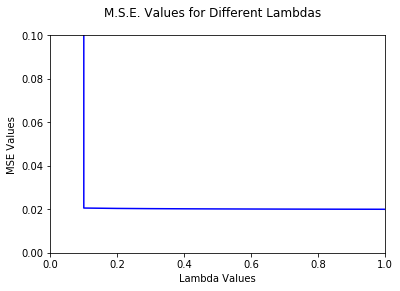

In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

INITIAL_DATA = None

def set_initial_data(data_path):
    global INITIAL_DATA
    with open(data_path,'r') as f:
        INITIAL_DATA = f.readlines()

def generate_80_20_splits(num_splits,saving_name='CandC'):
    if not INITIAL_DATA:
        print("Please set initial data first!")
        return None

    split_20_num = int(len(INITIAL_DATA) * 0.2)

    for i in range(1,num_splits+1):
        temp_data = deepcopy(INITIAL_DATA)
        test_split = ""
        for j in range(0,split_20_num):
            test_selection = random.randint(0,len(temp_data)-1)
            test_split+= temp_data[test_selection]
            temp_data.pop(test_selection)

        train_split = "".join(temp_data)
        with open("{}-train{}.csv".format(saving_name,i),'w') as f:
            f.write(train_split)
        with open("{}-test{}.csv".format(saving_name,i),'w') as f:
            f.write(test_split)

def split_x_y(data):
    '''
    Takes in a list of rows where all columns except last one are xi's
    and splits them into separate vectors
    '''

    split_data = []

    for line in data:
        temp_line = line.split(',')
        y_vector = [float(temp_line[-1])]
        temp_line.pop(-1)
        x_vector = [float(i) for i in temp_line]

        split_data.append((x_vector,y_vector))

    return split_data

def extract_x_from_split_data(data):
    x_matrix = []
    for row in data:
        x_matrix.append(row[0])
    return x_matrix

def extract_y_from_split_data(data):
    y_matrix = []
    for row in data:
        y_matrix.append(row[1])
    return y_matrix


def get_best_fit(x_matrix,y_matrix):
    '''
    Using the initialized data set this method finds the best fit for the data.
    It uses the least squares regression method and returns an array containing
    all the coefficients found with this method.
    '''

    mpps_x = np.linalg.pinv(np.array(x_matrix))

    return np.matmul(mpps_x,np.array(y_matrix))


def get_best_fit_l2(x_matrix,y_matrix,lambda_val):
    x_matrix = np.array(x_matrix)
    y_matrix = np.array(y_matrix)

    output = np.matmul(x_matrix.transpose(),x_matrix)
    output = output + (lambda_val*np.identity(len(x_matrix[0])))
    output = np.linalg.inv(output)
    output = np.matmul(np.matmul(output,x_matrix.transpose()),y_matrix)
    return output


def get_predictions(coefficients,x_matrix):
    predictions = []
    for i in range(0,len(x_matrix)):
        prediction = 0
        for j in range(0,len(x_matrix[i])):
            prediction += coefficients[j]*x_matrix[i][j]
        predictions.append(prediction)

    return predictions

def get_mean_squared_error(target_values, predictions):
    output = 0
    num_predictions = len(predictions)

    for i in range(0, num_predictions):
        output += ((target_values[i] - predictions[i]) ** 2)

    return (output / num_predictions)[0]


def divide_interval(interval,num_divisions,end_point_inclusive=True):
    '''
    This method takes in a tuple that represents an interval and returns a list with the given number
    of divisions. If the variable end_point_inclusive is set to true then the returned list has
    the end_point_included
    '''
    output = [interval[0]]
    if interval[0] < interval[1]:
        delta = (interval[1] - interval[0])/num_divisions
        point = interval[0] + delta
        while point < interval[1]:
            output.append(point)
            point+=delta

    if end_point_inclusive:
        output.append(interval[1])

    return output


def find_min(dict_in):
    '''
    Takes a dictionary as input and returns the key and val with the smallest value
    '''
    if len(dict_in) < 1:
        return None

    min_key = list(dict_in.keys())[0]
    min_value = dict_in[min_key]
    output = [min_key,min_value]

    for key,val in dict_in.items():
        if val < output[1]:
            output[0] = key
            output[1] = val

    return output

def run_a():
    init_data_path = 'Datasets/CrimeData/crime_data_updated_custom.csv'
    split_data_name = 'Datasets/CrimeData/CandC'
    num_splits = 5
    lambda_divisions = 10

    print("Initializing data from {}".format(init_data_path))
    set_initial_data(init_data_path)

    print("Generating {} 80-20 splits with the initial data".format(num_splits))
    generate_80_20_splits(num_splits, saving_name=split_data_name)

    lambda_values = divide_interval([0, 1], lambda_divisions, True)
    mse_dict = {}
    for l_val in lambda_values:
        total_mse = 0
        for i in range(1, num_splits + 1):
            training_data = []
            testing_data = []

            with open("{}-train{}.csv".format(split_data_name, i), 'r') as f:
                training_data = f.readlines()

            with open("{}-test{}.csv".format(split_data_name, i), 'r') as f:
                testing_data = f.readlines()

            split_training_data = split_x_y(training_data)
            split_testing_data = split_x_y(testing_data)

            training_data_x = extract_x_from_split_data(split_training_data)
            training_data_y = extract_y_from_split_data(split_training_data)
            testing_data_x = extract_x_from_split_data(split_testing_data)
            testing_data_y = extract_y_from_split_data(split_testing_data)

            best_fit_coefficients = get_best_fit_l2(training_data_x, training_data_y, l_val)
            predictions = get_predictions(best_fit_coefficients, testing_data_x)
            mse = get_mean_squared_error(testing_data_y, predictions)

            total_mse += mse

        avg_mse = total_mse / num_splits
        mse_dict[l_val] = avg_mse

    min_mse = find_min(mse_dict)
    print("The smallest MSE {} was found for {}".format(min_mse[1], min_mse[0]))
    plt.plot(mse_dict.keys(), mse_dict.values(), 'b-')
    plt.xlabel("Lambda Values")
    plt.ylabel("MSE Values")
    plt.axis([0, 1, 0, 0.1])
    plt.suptitle("M.S.E. Values for Different Lambdas")
    plt.show()


if __name__ == "__main__":
    run_a()

##### c)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

INITIAL_DATA = None

def set_initial_data(data_path):
    global INITIAL_DATA
    with open(data_path,'r') as f:
        INITIAL_DATA = f.readlines()

def generate_80_20_splits(num_splits,saving_name='CandC'):
    if not INITIAL_DATA:
        print("Please set initial data first!")
        return None

    split_20_num = int(len(INITIAL_DATA) * 0.2)

    for i in range(1,num_splits+1):
        temp_data = deepcopy(INITIAL_DATA)
        test_split = ""
        for j in range(0,split_20_num):
            test_selection = random.randint(0,len(temp_data)-1)
            test_split+= temp_data[test_selection]
            temp_data.pop(test_selection)

        train_split = "".join(temp_data)
        with open("{}-train{}.csv".format(saving_name,i),'w') as f:
            f.write(train_split)
        with open("{}-test{}.csv".format(saving_name,i),'w') as f:
            f.write(test_split)

def split_x_y(data):
    '''
    Takes in a list of rows where all columns except last one are xi's
    and splits them into separate vectors
    '''

    split_data = []

    for line in data:
        temp_line = line.split(',')
        y_vector = [float(temp_line[-1])]
        temp_line.pop(-1)
        x_vector = [float(i) for i in temp_line]

        split_data.append((x_vector,y_vector))

    return split_data

def extract_x_from_split_data(data):
    x_matrix = []
    for row in data:
        x_matrix.append(row[0])
    return x_matrix

def extract_y_from_split_data(data):
    y_matrix = []
    for row in data:
        y_matrix.append(row[1])
    return y_matrix


def get_best_fit(x_matrix,y_matrix):
    '''
    Using the initialized data set this method finds the best fit for the data.
    It uses the least squares regression method and returns an array containing
    all the coefficients found with this method.
    '''

    mpps_x = np.linalg.pinv(np.array(x_matrix))

    return np.matmul(mpps_x,np.array(y_matrix))


def get_best_fit_l2(x_matrix,y_matrix,lambda_val):
    x_matrix = np.array(x_matrix)
    y_matrix = np.array(y_matrix)

    output = np.matmul(x_matrix.transpose(),x_matrix)
    output = output + (lambda_val*np.identity(len(x_matrix[0])))
    output = np.linalg.inv(output)
    output = np.matmul(np.matmul(output,x_matrix.transpose()),y_matrix)
    return output


def get_predictions(coefficients,x_matrix):
    predictions = []
    for i in range(0,len(x_matrix)):
        prediction = 0
        for j in range(0,len(x_matrix[i])):
            prediction += coefficients[j]*x_matrix[i][j]
        predictions.append(prediction)

    return predictions

def get_mean_squared_error(target_values, predictions):
    output = 0
    num_predictions = len(predictions)

    for i in range(0, num_predictions):
        output += ((target_values[i] - predictions[i]) ** 2)

    return (output / num_predictions)[0]


def divide_interval(interval,num_divisions,end_point_inclusive=True):
    '''
    This method takes in a tuple that represents an interval and returns a list with the given number
    of divisions. If the variable end_point_inclusive is set to true then the returned list has
    the end_point_included
    '''
    output = [interval[0]]
    if interval[0] < interval[1]:
        delta = (interval[1] - interval[0])/num_divisions
        point = interval[0] + delta
        while point < interval[1]:
            output.append(point)
            point+=delta

    if end_point_inclusive:
        output.append(interval[1])

    return output


def find_min(dict_in):
    '''
    Takes a dictionary as input and returns the key and val with the smallest value
    '''
    if len(dict_in) < 1:
        return None

    min_key = list(dict_in.keys())[0]
    min_value = dict_in[min_key]
    output = [min_key,min_value]

    for key,val in dict_in.items():
        if val < output[1]:
            output[0] = key
            output[1] = val

    return output



def remove_missing_data_cols(data_path,removal_threshold=0.5):
    '''
    This method removes all variables that have instances greater that the removal threshold for missing data
    and updates the rest of the missing data with median.
    '''

    with open(data_path,'r') as f:
        lines=f.readlines()

    missing_data_cols = {}
    for i in range(0,len(lines[0].split(','))):
        missing_data_cols[i] = 0

    for line in lines:
        temp_list = line.split(',')
        for i in range(0,len(temp_list)):
            if temp_list[i] == "":
                missing_data_cols[i]+=1

    total_features = len(lines)
    removal_threshold = removal_threshold*total_features
    output = ""

    for line in lines:
        temp_list=line.split(',')
        formatted_list = []
        for i in range(0,len(temp_list)):
            if missing_data_cols[i] < removal_threshold:
                formatted_list.append(temp_list[i])
        output+= (',').join(formatted_list)

    return output

def remove_missing_data_rows(data_path):
    '''
    This method removes all rows that have any missing data
    '''
    output = ""
    with open(data_path,'r') as f:
        lines=f.readlines()

    for line in lines:
        add_to_output = True
        temp_list=line.split(',')
        for i in range(0,len(temp_list)):
            if temp_list[i] == "":
                add_to_output=False
                break
        if add_to_output:
            output+=line

    return output


def run_a():
    init_data_path = 'Datasets/CrimeData/crime_data_updated_custom.csv'
    split_data_name = 'Datasets/CrimeData/CandC'
    num_splits = 5
    lambda_divisions = 10

    print("Initializing data from {}".format(init_data_path))
    set_initial_data(init_data_path)

    print("Generating {} 80-20 splits with the initial data".format(num_splits))
    generate_80_20_splits(num_splits, saving_name=split_data_name)

    lambda_values = divide_interval([0, 1], lambda_divisions, True)
    mse_dict = {}
    for l_val in lambda_values:
        total_mse = 0
        for i in range(1, num_splits + 1):
            training_data = []
            testing_data = []

            with open("{}-train{}.csv".format(split_data_name, i), 'r') as f:
                training_data = f.readlines()

            with open("{}-test{}.csv".format(split_data_name, i), 'r') as f:
                testing_data = f.readlines()

            split_training_data = split_x_y(training_data)
            split_testing_data = split_x_y(testing_data)

            training_data_x = extract_x_from_split_data(split_training_data)
            training_data_y = extract_y_from_split_data(split_training_data)
            testing_data_x = extract_x_from_split_data(split_testing_data)
            testing_data_y = extract_y_from_split_data(split_testing_data)

            best_fit_coefficients = get_best_fit_l2(training_data_x, training_data_y, l_val)
            predictions = get_predictions(best_fit_coefficients, testing_data_x)
            mse = get_mean_squared_error(testing_data_y, predictions)

            total_mse += mse

        avg_mse = total_mse / num_splits
        mse_dict[l_val] = avg_mse

    min_mse = find_min(mse_dict)
    print("The smallest MSE {} was found for {}".format(min_mse[1], min_mse[0]))
    plt.plot(mse_dict.keys(), mse_dict.values(), 'b-')
    plt.xlabel("Lambda Values")
    plt.ylabel("MSE Values")
    plt.axis([0, 1, 0, 0.1])
    plt.suptitle("M.S.E. Values for Different Lambdas")
    plt.show()

def run_c():
    removal_threshold = 0.2
    init_data_path = 'Datasets/CrimeData/crime_data_updated_custom.csv'
    reduced_data_path = 'Datasets/CrimeData/crime_data_feature_reduced.csv'
    split_data_name = 'Datasets/CrimeData/CandC'
    num_splits = 5
    lambda_divisions = 10

    print("Removing data columns with missing data over {} of the total data".format(removal_threshold))
    refined_data = remove_missing_data_cols(data_path=init_data_path,removal_threshold=removal_threshold)
    with open(reduced_data_path,'w') as f:
        f.write(refined_data)
    print("Removing all rows with missing data")
    refined_data = remove_missing_data_rows(reduced_data_path)
    with open(reduced_data_path,'w') as f:
        f.write(refined_data)
    print("Updated data saved to {}".format(reduced_data_path))

    print("Initializing data from {}".format(reduced_data_path))
    set_initial_data(reduced_data_path)
    print("Generating {} 80-20 splits with the initial data".format(num_splits))
    generate_80_20_splits(num_splits, saving_name=split_data_name)

    lambda_values = divide_interval([0, 1], lambda_divisions, True)
    mse_dict = {}
    for l_val in lambda_values:
        total_mse = 0
        for i in range(1, num_splits + 1):
            training_data = []
            testing_data = []

            with open("{}-train{}.csv".format(split_data_name, i), 'r') as f:
                training_data = f.readlines()

            with open("{}-test{}.csv".format(split_data_name, i), 'r') as f:
                testing_data = f.readlines()

            split_training_data = split_x_y(training_data)
            split_testing_data = split_x_y(testing_data)

            training_data_x = extract_x_from_split_data(split_training_data)
            training_data_y = extract_y_from_split_data(split_training_data)
            testing_data_x = extract_x_from_split_data(split_testing_data)
            testing_data_y = extract_y_from_split_data(split_testing_data)

            best_fit_coefficients = get_best_fit_l2(training_data_x, training_data_y, l_val)
            predictions = get_predictions(best_fit_coefficients, testing_data_x)
            mse = get_mean_squared_error(testing_data_y, predictions)

            total_mse += mse

        avg_mse = total_mse / num_splits
        mse_dict[l_val] = avg_mse

    min_mse = find_min(mse_dict)
    print("The smallest MSE {} was found for {}".format(min_mse[1], min_mse[0]))
    plt.plot(mse_dict.keys(), mse_dict.values(), 'b-')
    plt.xlabel("Lambda Values")
    plt.ylabel("MSE Values")
    plt.axis([0, 1, 0, 0.1])
    plt.suptitle("M.S.E. Values for Different Lambdas")
    plt.show()


if __name__ == "__main__":
    run_c()

Removing data columns with missing data over 0.2 of the total data
Removing all rows with missing data
Updated data saved to Datasets/CrimeData/crime_data_feature_reduced.csv
Initializing data from Datasets/CrimeData/crime_data_feature_reduced.csv
Generating 5 80-20 splits with the initial data
The smallest MSE 0.018719129594838187 was found for 1


<Figure size 640x480 with 1 Axes>